# Comparison of various attack on robust models 
- included: FMN, ALMA, APGD, DDN

In [1]:
from sweeping import Sweeper
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
sweeper = Sweeper.from_jsonfile("config.json")

In [3]:
sweeper.logger.load_all()

# Metrics

In [4]:
report = sweeper.logger.report()
report.reset_index(drop=True)

dataset  norm                                 model attack steps  \
0    CIFAR10  Linf           Engstrom2019Robustness_linf   apgd  1020   
1    CIFAR10    L2             Gowal2020Uncovering_extra    fmn   100   
2    CIFAR10  Linf           Engstrom2019Robustness_linf    fmn   100   
3    CIFAR10    L1                  Maini2020MultipleMSD    fmn   100   
4    CIFAR10    L2             Engstrom2019Robustness_l2    fmn  1000   
..       ...   ...                                   ...    ...   ...   
329  CIFAR10    L1                  Maini2020MultipleMSD    fmn   100   
330  CIFAR10    L2   Rebuffi2021Fixing_70_16_cutmix_ddpm    fmn  1000   
331  CIFAR10    L2   Rebuffi2021Fixing_70_16_cutmix_ddpm    fmn   100   
332  CIFAR10    L1                  Maini2020MultipleAVG    fmn  1000   
333  CIFAR10  Linf  Rebuffi2021Fixing_70_16_cutmix_extra    fmn   100   

                                                params     median   n_qs  \
0    -binary_search_steps-10-loss_f-DL-max_eps-0.1-...   0.036719  340.0   
1    -binary_search_steps-10-loss_f-DL-steps-100-α_...   1.088595   28.0   
2    -binary_search_steps-10-loss_f-DL-steps-100-α_...   0.036654   12.0   
3    -binary_search_steps-10-loss_f-DL-steps-100-α_...  12.991331   56.0   
4    -binary_search_steps-10-loss_f-DL-steps-1000-α...   0.857853    8.0   
..                                                 ...        ...    ...   
329  -binary_search_steps-10-loss_f-DL-steps-100-α_...  13.030643   21.0   
330  -binary_search_steps-10-loss_f-DL-steps-1000-α...   1.155581   20.0   
331  -binary_search_steps-10-loss_f-DL-steps-100-α_...   1.162400   25.0   
332  -binary_search_steps-10-loss_f-DL-steps-1000-α...  13.091969  714.0   
333  -binary_search_steps-10-loss_f-DL-steps-100-α_...   0.035681   42.0   

            asr  
0    100.000000  
1    100.000000  
2    100.000000  
3     98.192771  
4    100.000000  
..          ...  
329  100.000000  
330  100.000000  
331  100.000000  
332   97.076023  
333  100.000000  

[334 rows x 9 columns]

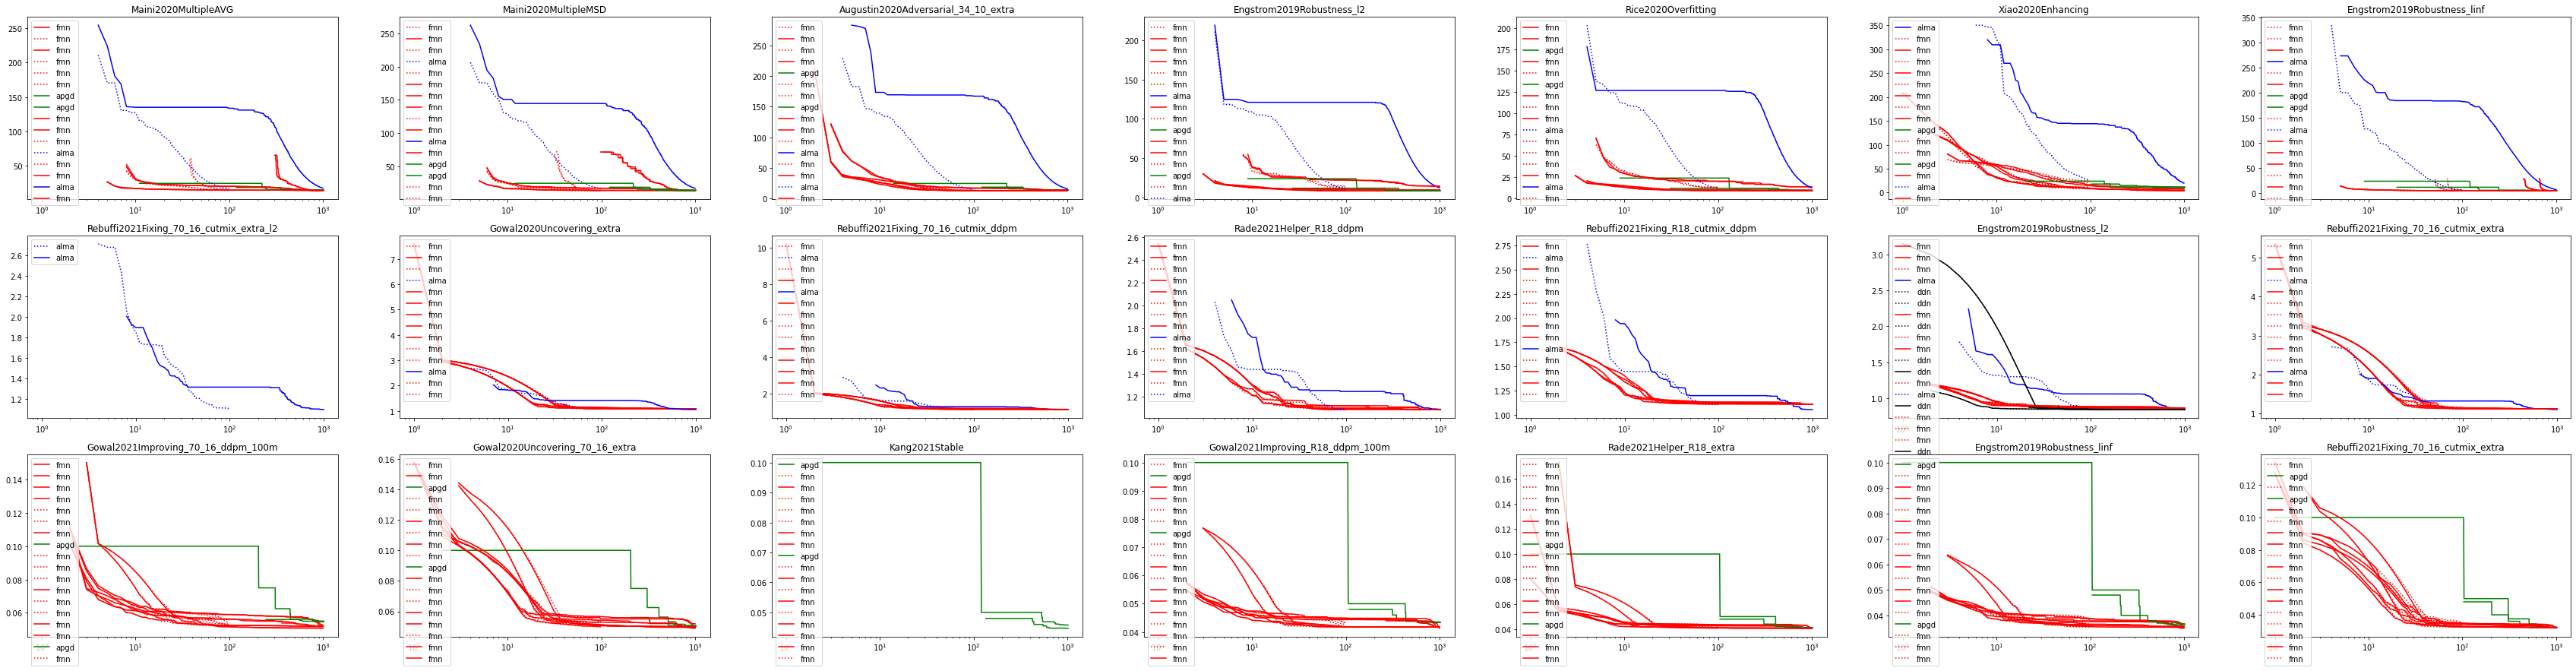

In [5]:
sweeper.logger.plot_QD_grid(figsize=(60,15))

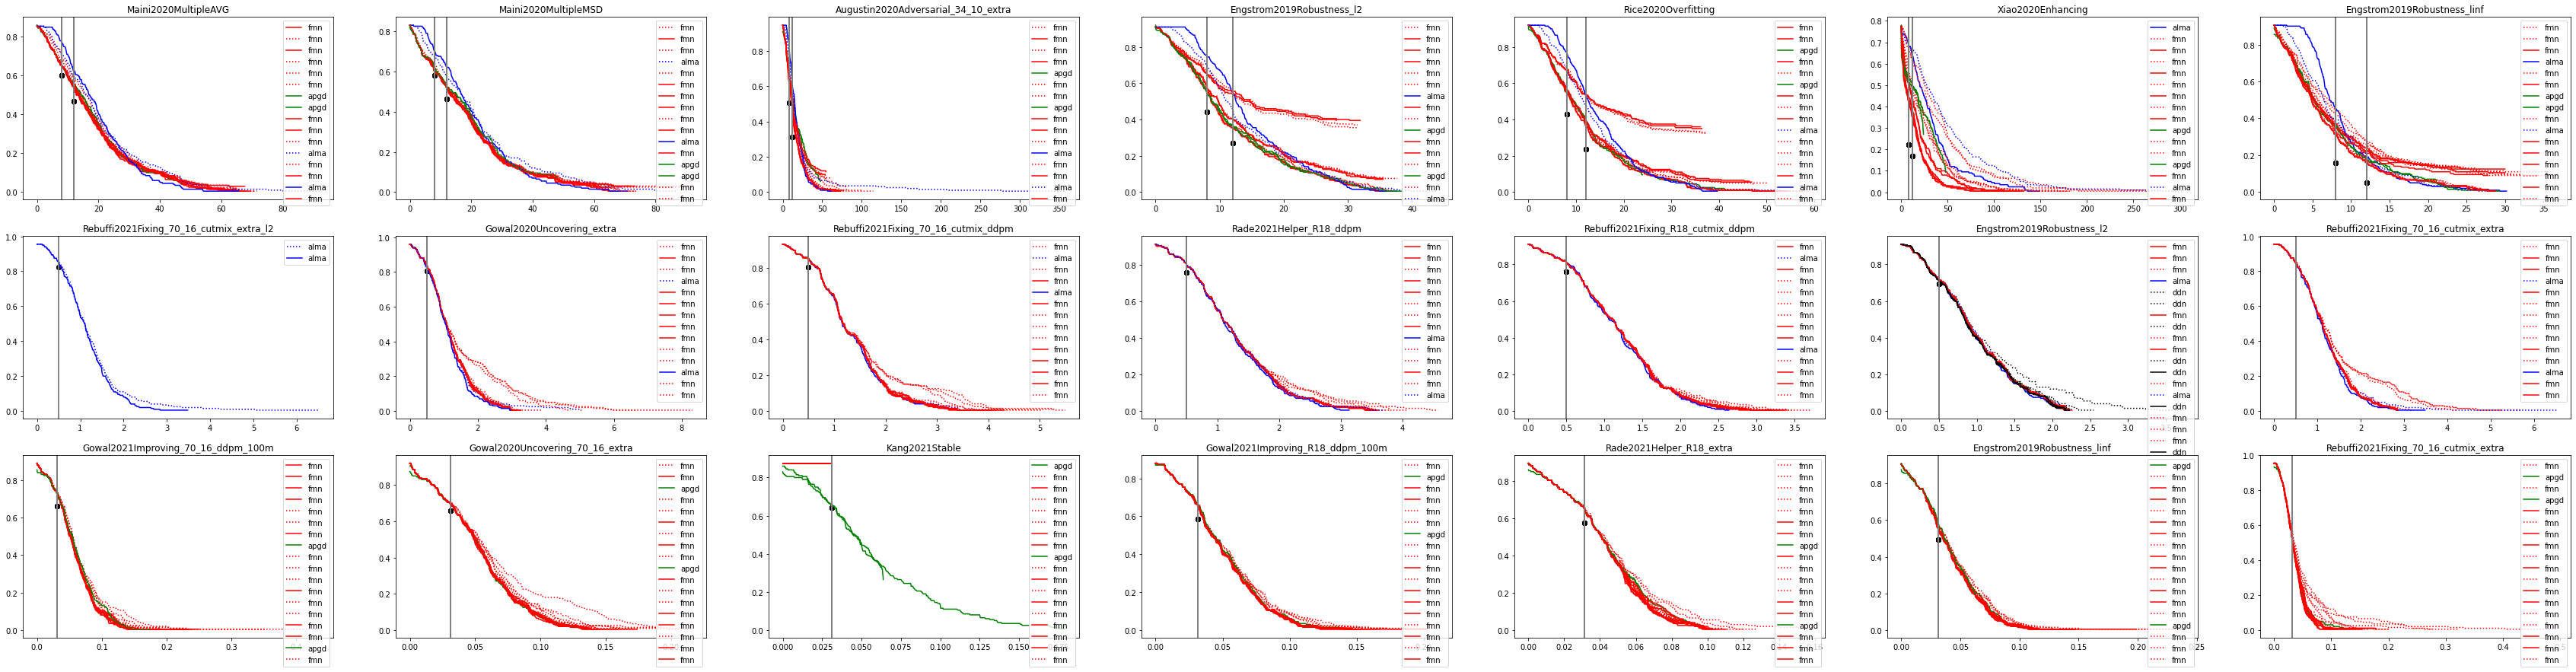

In [6]:
sweeper.logger.plot_SE_grid(figsize=(60,15))

# Interpretation

## Linf

In [7]:
report = sweeper.logger.report(sweeper.logger.where(norm="Linf"))
report.reset_index(drop=True)

dataset  norm                                 model attack steps  \
0    CIFAR10  Linf           Engstrom2019Robustness_linf   apgd  1020   
1    CIFAR10  Linf           Engstrom2019Robustness_linf    fmn   100   
2    CIFAR10  Linf              Rade2021Helper_R18_extra    fmn   100   
3    CIFAR10  Linf                        Kang2021Stable   apgd  1020   
4    CIFAR10  Linf           Engstrom2019Robustness_linf    fmn  1000   
..       ...   ...                                   ...    ...   ...   
121  CIFAR10  Linf              Rade2021Helper_R18_extra    fmn  1000   
122  CIFAR10  Linf                        Kang2021Stable    fmn   100   
123  CIFAR10  Linf              Rade2021Helper_R18_extra    fmn  1000   
124  CIFAR10  Linf              Rade2021Helper_R18_extra    fmn  1000   
125  CIFAR10  Linf  Rebuffi2021Fixing_70_16_cutmix_extra    fmn   100   

                                                params    median   n_qs    asr  
0    -binary_search_steps-10-loss_f-DL-max_eps-0.1-...  0.036719  340.0  100.0  
1    -binary_search_steps-10-loss_f-DL-steps-100-α_...  0.036654   12.0  100.0  
2    -binary_search_steps-10-loss_f-DL-steps-100-α_...  0.040767   11.0  100.0  
3    -binary_search_steps-10-loss_f-DL-max_eps-0.1-...  0.045801  121.0  100.0  
4    -binary_search_steps-10-loss_f-DL-steps-1000-α...  0.035732   14.0  100.0  
..                                                 ...       ...    ...    ...  
121  -binary_search_steps-10-loss_f-DL-steps-1000-α...  0.040761   11.0  100.0  
122  -binary_search_steps-10-loss_f-DL-steps-100-α_...       inf    0.0    0.0  
123  -binary_search_steps-10-loss_f-DL-steps-1000-α...  0.040691   14.0  100.0  
124  -binary_search_steps-10-loss_f-DL-steps-1000-α...  0.040691   21.0  100.0  
125  -binary_search_steps-10-loss_f-DL-steps-100-α_...  0.035681   42.0  100.0  

[126 rows x 9 columns]

## Best params results

In [8]:
report[report.attack == "fmn"][report.model == "Engstrom2019Robustness_linf"]

<ipython-input-8-09390af9a169>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  report[report.attack == "fmn"][report.model == "Engstrom2019Robustness_linf"]


dataset  norm  \
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  CIFAR10  Linf   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  CIFAR10  Linf   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  CIFAR10  Linf   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  CIFAR10  Linf   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  CIFAR10  Linf   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  CIFAR10  Linf   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  CIFAR10  Linf   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  CIFAR10  Linf   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  CIFAR10  Linf   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  CIFAR10  Linf   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  CIFAR10  Linf   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  CIFAR10  Linf   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  CIFAR10  Linf   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  CIFAR10  Linf   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  CIFAR10  Linf   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  CIFAR10  Linf   

                                                                          model  \
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  Engstrom2019Robustness_linf   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  Engstrom2019Robustness_linf   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  Engstrom2019Robustness_linf   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  Engstrom2019Robustness_linf   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  Engstrom2019Robustness_linf   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  Engstrom2019Robustness_linf   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  Engstrom2019Robustness_linf   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  Engstrom2019Robustness_linf   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  Engstrom2019Robustness_linf   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  Engstrom2019Robustness_linf   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  Engstrom2019Robustness_linf   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  Engstrom2019Robustness_linf   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  Engstrom2019Robustness_linf   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  Engstrom2019Robustness_linf   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  Engstrom2019Robustness_linf   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  Engstrom2019Robustness_linf   

                                                   attack steps  \
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...    fmn   100   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...    fmn  1000   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...    fmn  1000   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...    fmn   100   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...    fmn  1000   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...    fmn  1000   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...    fmn   100   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...    fmn  1000   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...    fmn  1000   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...    fmn   100   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...    fmn  1000   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...    fmn  1000   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...    fmn   100   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...    fmn   100   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...    fmn   100   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...    fmn   100   

                                                                                               params  \
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  -binary_search_steps-10-loss_f-DL-steps-100-α_...   
dataset-CIFAR10-norm-Linf-attack-fmn-model-Engs...  -binary_search_steps-10-loss_f-DL-steps-1000-α...   
dataset-CIF

In [9]:
report.groupby(["model", "attack"])["median"].min()

model                                 attack
Engstrom2019Robustness_linf           apgd      0.036313
                                      fmn       0.034991
Gowal2020Uncovering_70_16_extra       apgd      0.050156
                                      fmn       0.048927
Gowal2021Improving_70_16_ddpm_100m    apgd      0.054625
                                      fmn       0.050779
Gowal2021Improving_R18_ddpm_100m      apgd      0.043313
                                      fmn       0.041316
Kang2021Stable                        apgd      0.044719
                                      fmn            inf
Rade2021Helper_R18_extra              apgd      0.040875
                                      fmn       0.040691
Rebuffi2021Fixing_70_16_cutmix_extra  apgd      0.032129
                                      fmn       0.031729
Name: median, dtype: float64

In [10]:
report.groupby(["attack", "model"])["n_qs"].min()

attack  model                               
apgd    Engstrom2019Robustness_linf             340.0
        Gowal2020Uncovering_70_16_extra         324.0
        Gowal2021Improving_70_16_ddpm_100m      247.0
        Gowal2021Improving_R18_ddpm_100m        315.0
        Kang2021Stable                          121.0
        Rade2021Helper_R18_extra                309.0
        Rebuffi2021Fixing_70_16_cutmix_extra    410.0
fmn     Engstrom2019Robustness_linf               7.0
        Gowal2020Uncovering_70_16_extra          18.0
        Gowal2021Improving_70_16_ddpm_100m       13.0
        Gowal2021Improving_R18_ddpm_100m          7.0
        Kang2021Stable                            0.0
        Rade2021Helper_R18_extra                  6.0
        Rebuffi2021Fixing_70_16_cutmix_extra     24.0
Name: n_qs, dtype: float64

In [11]:
report.groupby(["attack", "model"])["asr"].max()

attack  model                               
apgd    Engstrom2019Robustness_linf             100.0
        Gowal2020Uncovering_70_16_extra         100.0
        Gowal2021Improving_70_16_ddpm_100m      100.0
        Gowal2021Improving_R18_ddpm_100m        100.0
        Kang2021Stable                          100.0
        Rade2021Helper_R18_extra                100.0
        Rebuffi2021Fixing_70_16_cutmix_extra    100.0
fmn     Engstrom2019Robustness_linf             100.0
        Gowal2020Uncovering_70_16_extra         100.0
        Gowal2021Improving_70_16_ddpm_100m      100.0
        Gowal2021Improving_R18_ddpm_100m        100.0
        Kang2021Stable                            0.0
        Rade2021Helper_R18_extra                100.0
        Rebuffi2021Fixing_70_16_cutmix_extra    100.0
Name: asr, dtype: float64

## QD in Linf

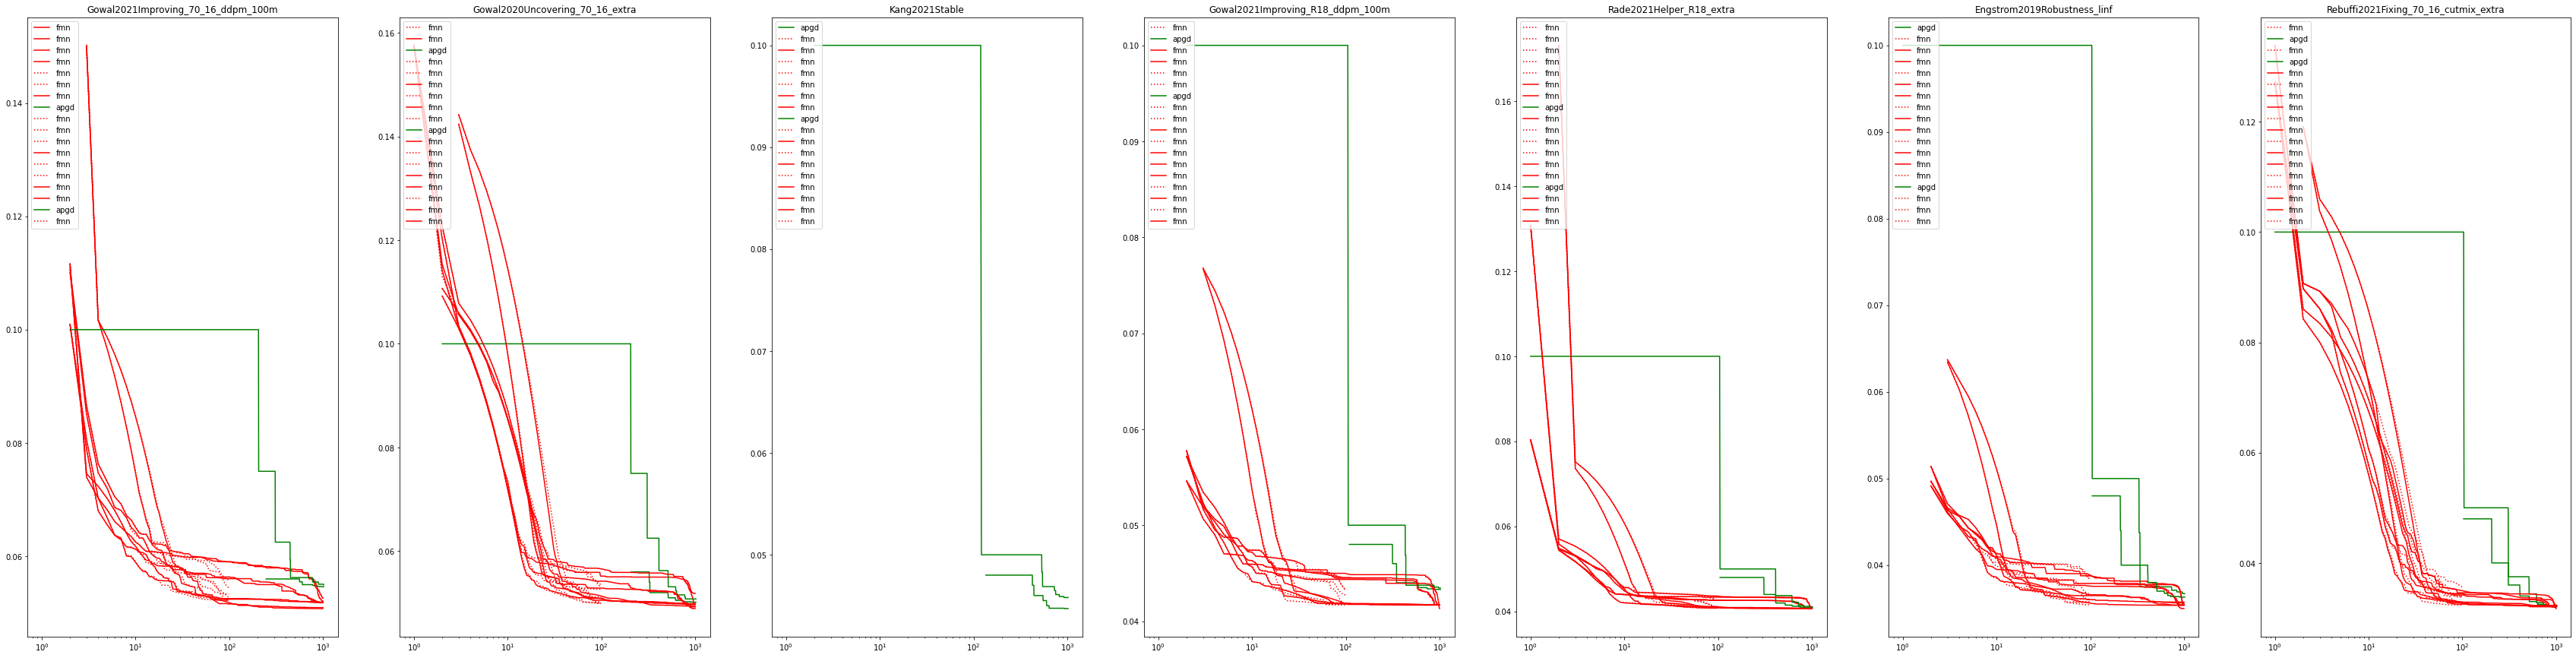

In [12]:
sweeper.logger.plot_QD_grid(where_settings={"norm":"Linf"}, figsize=(60,15))

dataset-CIFAR10-norm-Linf-attack-apgd-model-Engstrom2019Robustness_linf-binary_search_steps-10-loss_f-DL-max_eps-0.1-n_iter-100
dataset-CIFAR10-norm-Linf-attack-apgd-model-Kang2021Stable-binary_search_steps-10-loss_f-DL-max_eps-0.1-n_iter-100
dataset-CIFAR10-norm-Linf-attack-apgd-model-Gowal2020Uncovering_70_16_extra-binary_search_steps-10-loss_f-DL-max_eps-0.032-n_iter-100
dataset-CIFAR10-norm-Linf-attack-apgd-model-Gowal2021Improving_R18_ddpm_100m-binary_search_steps-10-loss_f-DL-max_eps-0.032-n_iter-100
dataset-CIFAR10-norm-Linf-attack-apgd-model-Rebuffi2021Fixing_70_16_cutmix_extra-binary_search_steps-10-loss_f-DL-max_eps-0.032-n_iter-100
dataset-CIFAR10-norm-Linf-attack-apgd-model-Rebuffi2021Fixing_70_16_cutmix_extra-binary_search_steps-10-loss_f-DL-max_eps-0.1-n_iter-100
dataset-CIFAR10-norm-Linf-attack-apgd-model-Kang2021Stable-binary_search_steps-10-loss_f-DL-max_eps-0.032-n_iter-100
dataset-CIFAR10-norm-Linf-attack-apgd-model-Gowal2020Uncovering_70_16_extra-binary_search_steps

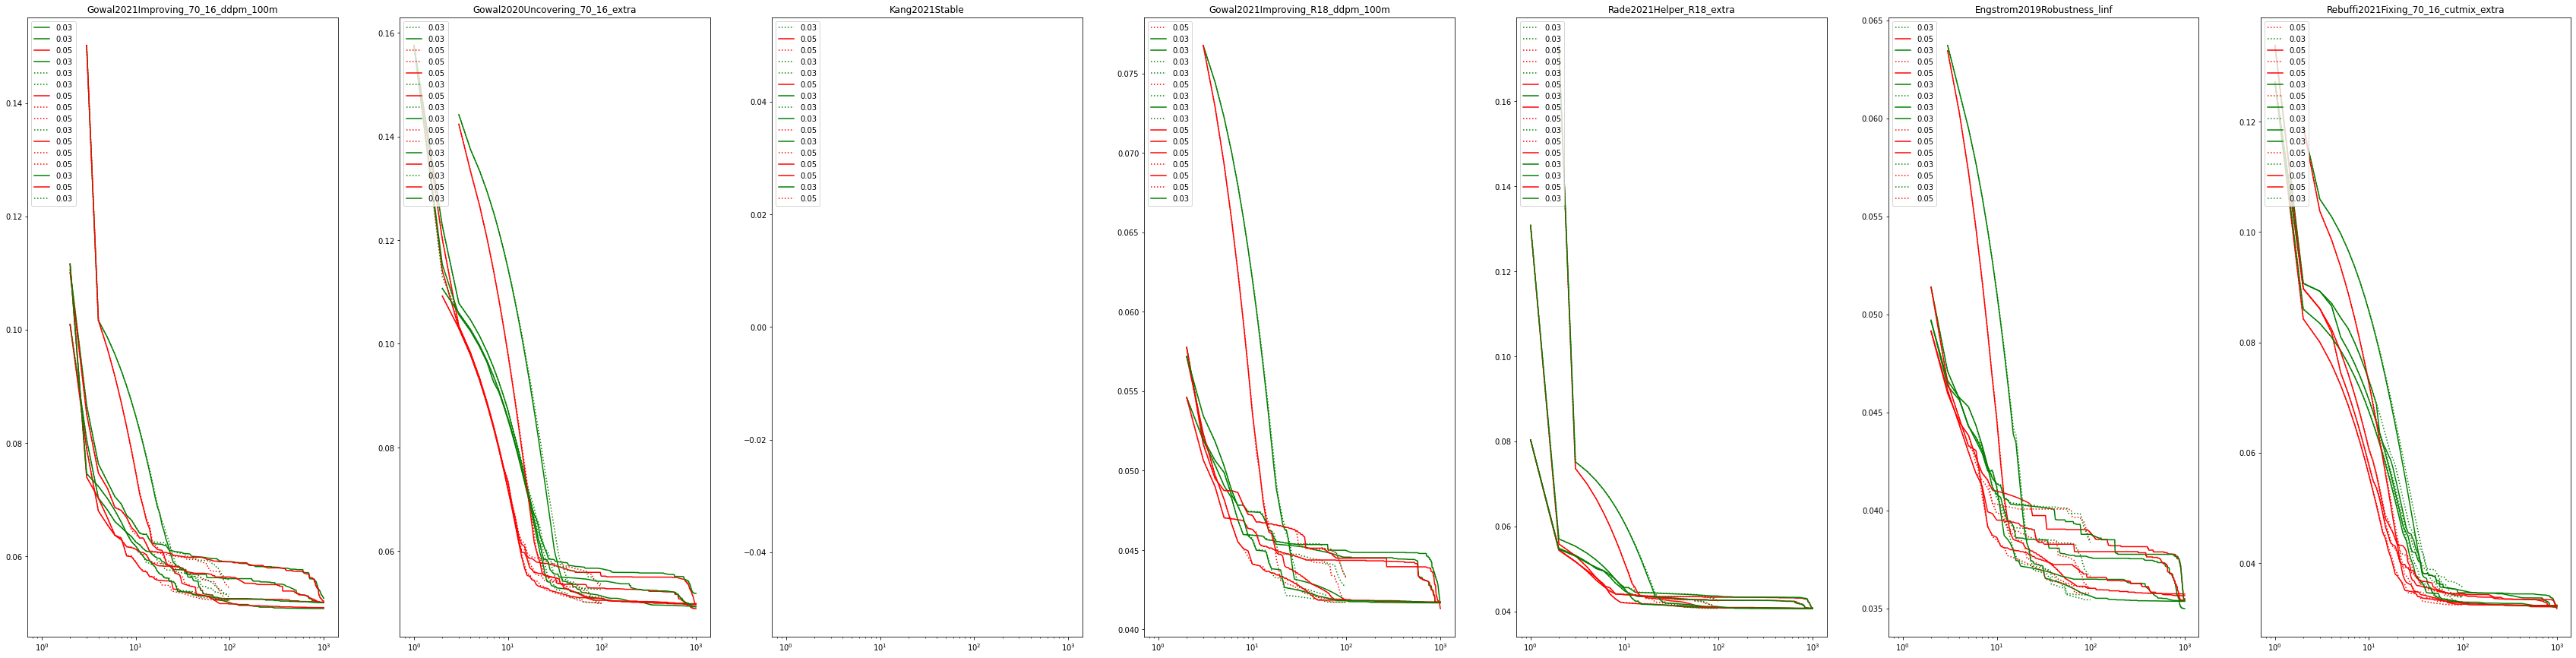

In [13]:
sweeper.logger.plot_QD_grid(where_settings={"norm":"Linf"}, figsize=(60,15), compare_on="γ_init")

## Observation 
* gamma_init = 0.05 looks better

dataset-CIFAR10-norm-Linf-attack-apgd-model-Engstrom2019Robustness_linf-binary_search_steps-10-loss_f-DL-max_eps-0.1-n_iter-100
dataset-CIFAR10-norm-Linf-attack-apgd-model-Kang2021Stable-binary_search_steps-10-loss_f-DL-max_eps-0.1-n_iter-100
dataset-CIFAR10-norm-Linf-attack-apgd-model-Gowal2020Uncovering_70_16_extra-binary_search_steps-10-loss_f-DL-max_eps-0.032-n_iter-100
dataset-CIFAR10-norm-Linf-attack-apgd-model-Gowal2021Improving_R18_ddpm_100m-binary_search_steps-10-loss_f-DL-max_eps-0.032-n_iter-100
dataset-CIFAR10-norm-Linf-attack-apgd-model-Rebuffi2021Fixing_70_16_cutmix_extra-binary_search_steps-10-loss_f-DL-max_eps-0.032-n_iter-100
dataset-CIFAR10-norm-Linf-attack-apgd-model-Rebuffi2021Fixing_70_16_cutmix_extra-binary_search_steps-10-loss_f-DL-max_eps-0.1-n_iter-100
dataset-CIFAR10-norm-Linf-attack-apgd-model-Kang2021Stable-binary_search_steps-10-loss_f-DL-max_eps-0.032-n_iter-100
dataset-CIFAR10-norm-Linf-attack-apgd-model-Gowal2020Uncovering_70_16_extra-binary_search_steps

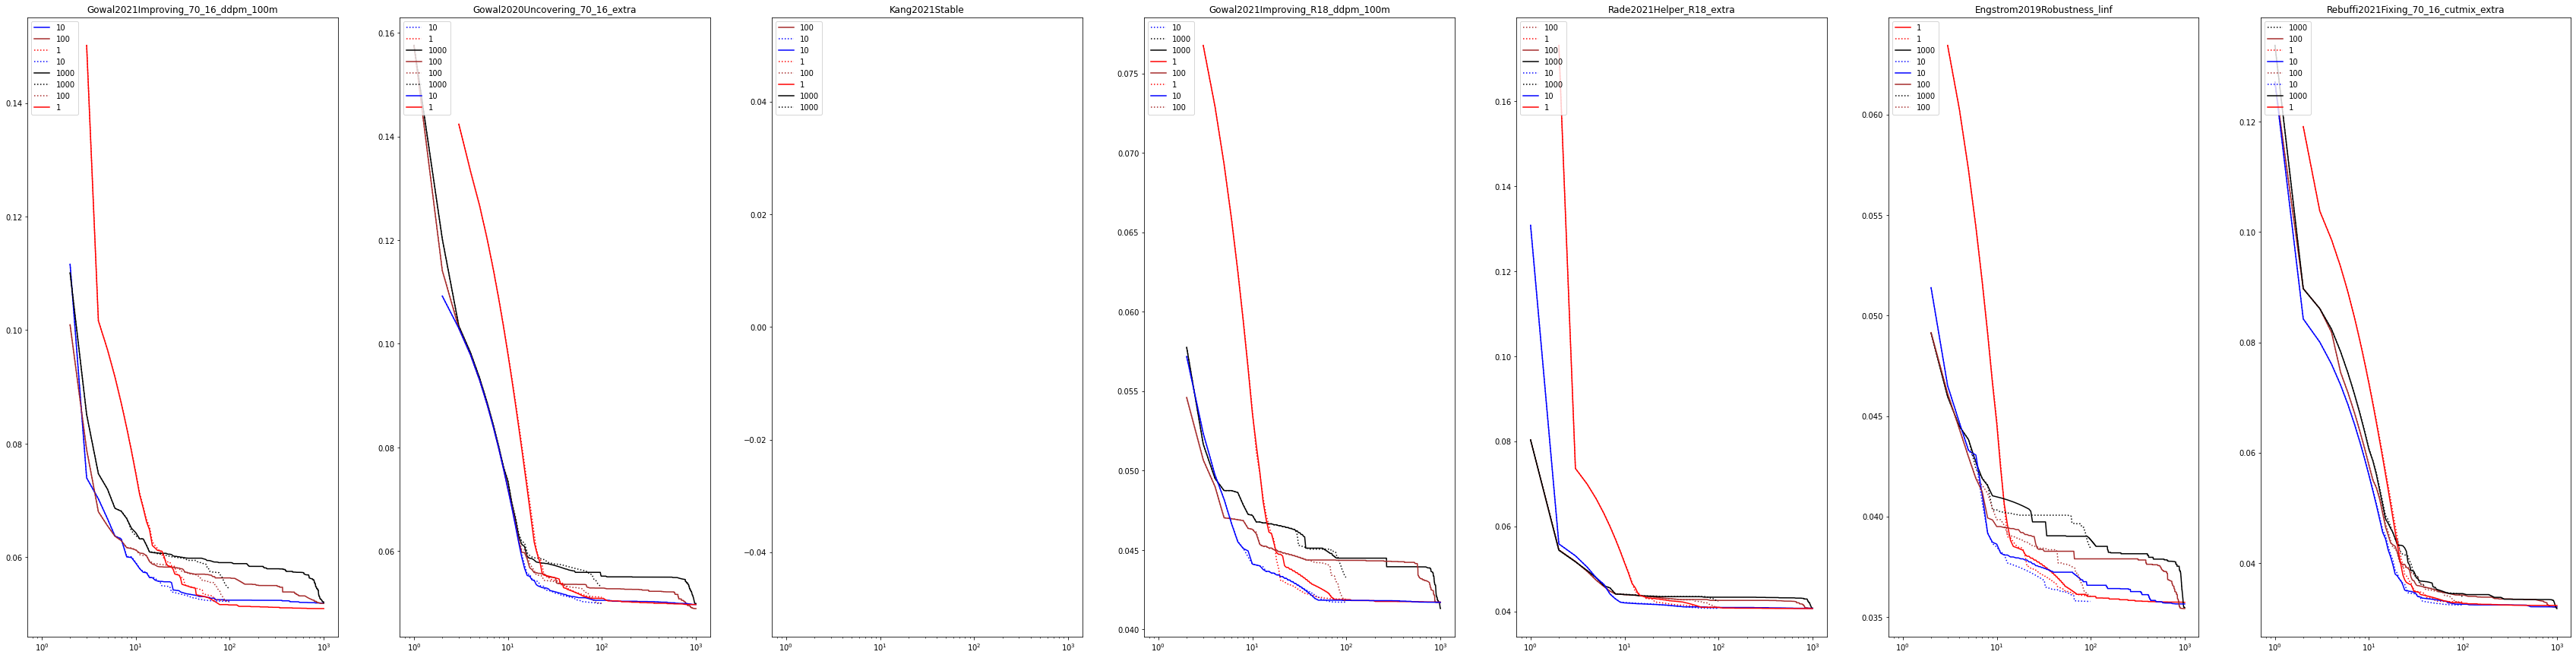

In [14]:
sweeper.logger.plot_QD_grid(where_settings={"norm":"Linf", "γ_init":"0.05"}, figsize=(60,15), compare_on="α_init")

## Observation 
* alpha_init = aplha size changes behaviour, but it is unclear which alplha is the best, generally, the aplha = 10 or 100 seem to be the best w.r.t. AUC QD 

## SE in Linf

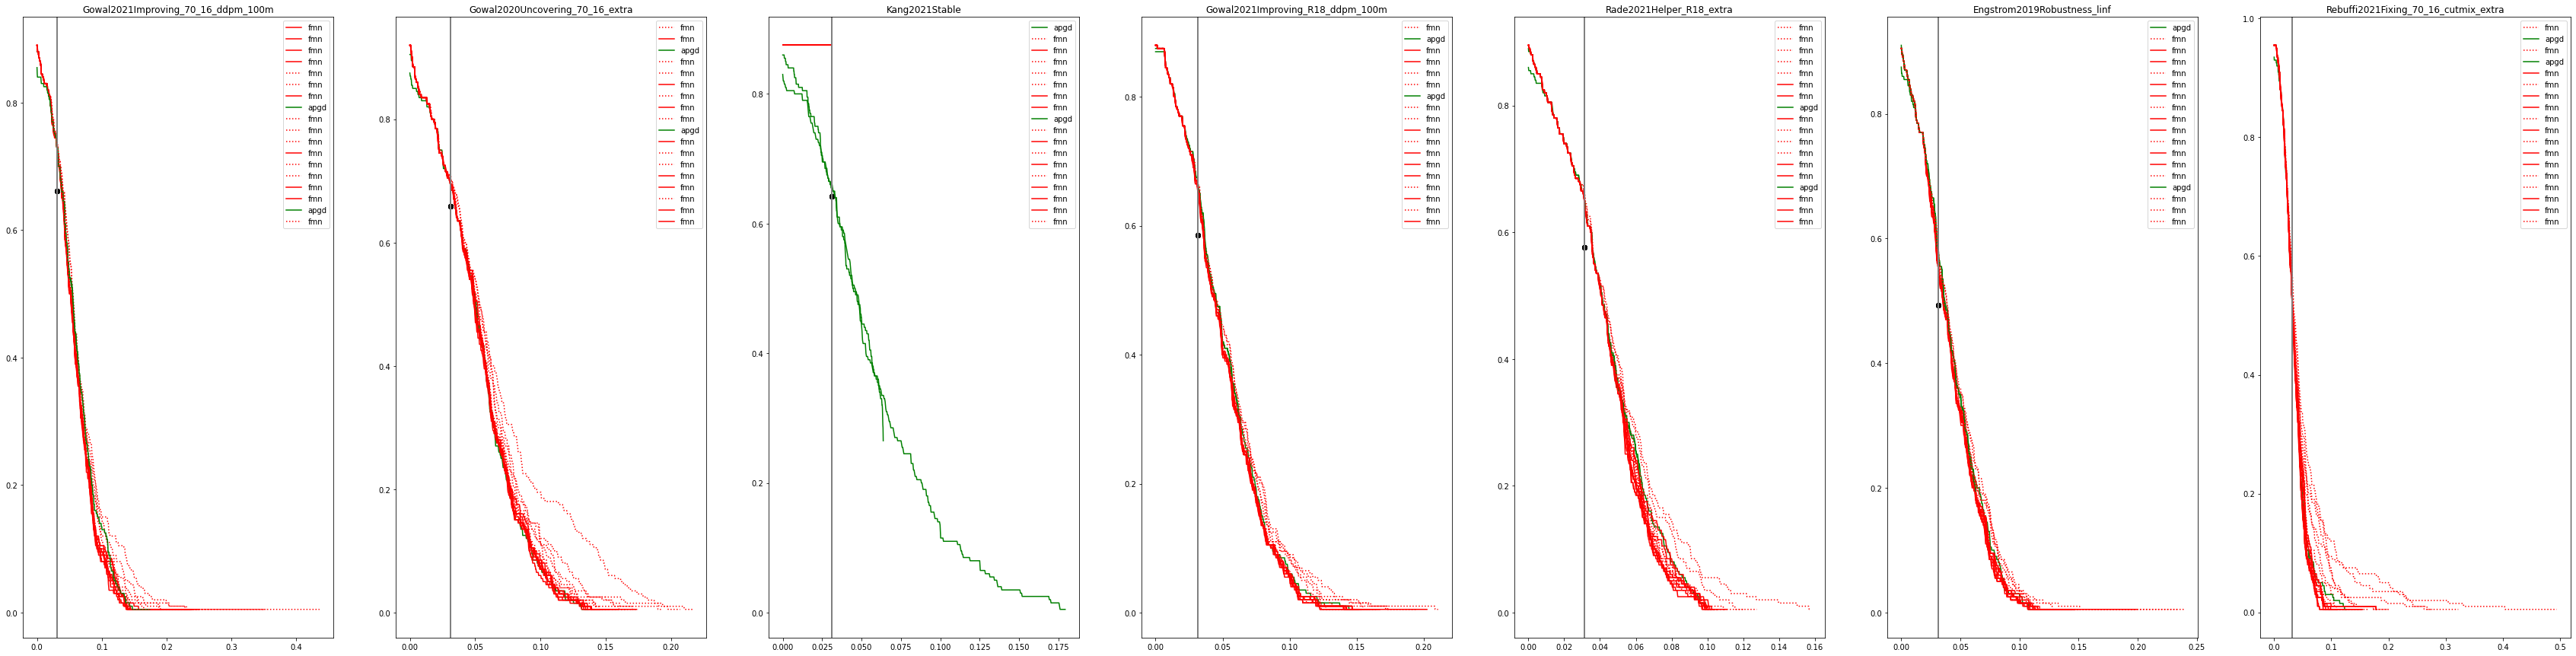

In [15]:
sweeper.logger.plot_SE_grid(where_settings={"norm":"Linf"}, figsize=(60,15))

## Observation 
* gamma_init = 0.05 looks better

dataset-CIFAR10-norm-Linf-attack-apgd-model-Engstrom2019Robustness_linf-binary_search_steps-10-loss_f-DL-max_eps-0.1-n_iter-100
dataset-CIFAR10-norm-Linf-attack-apgd-model-Kang2021Stable-binary_search_steps-10-loss_f-DL-max_eps-0.1-n_iter-100
dataset-CIFAR10-norm-Linf-attack-apgd-model-Gowal2020Uncovering_70_16_extra-binary_search_steps-10-loss_f-DL-max_eps-0.032-n_iter-100
dataset-CIFAR10-norm-Linf-attack-apgd-model-Gowal2021Improving_R18_ddpm_100m-binary_search_steps-10-loss_f-DL-max_eps-0.032-n_iter-100
dataset-CIFAR10-norm-Linf-attack-apgd-model-Rebuffi2021Fixing_70_16_cutmix_extra-binary_search_steps-10-loss_f-DL-max_eps-0.032-n_iter-100
dataset-CIFAR10-norm-Linf-attack-apgd-model-Rebuffi2021Fixing_70_16_cutmix_extra-binary_search_steps-10-loss_f-DL-max_eps-0.1-n_iter-100
dataset-CIFAR10-norm-Linf-attack-apgd-model-Kang2021Stable-binary_search_steps-10-loss_f-DL-max_eps-0.032-n_iter-100
dataset-CIFAR10-norm-Linf-attack-apgd-model-Gowal2020Uncovering_70_16_extra-binary_search_steps

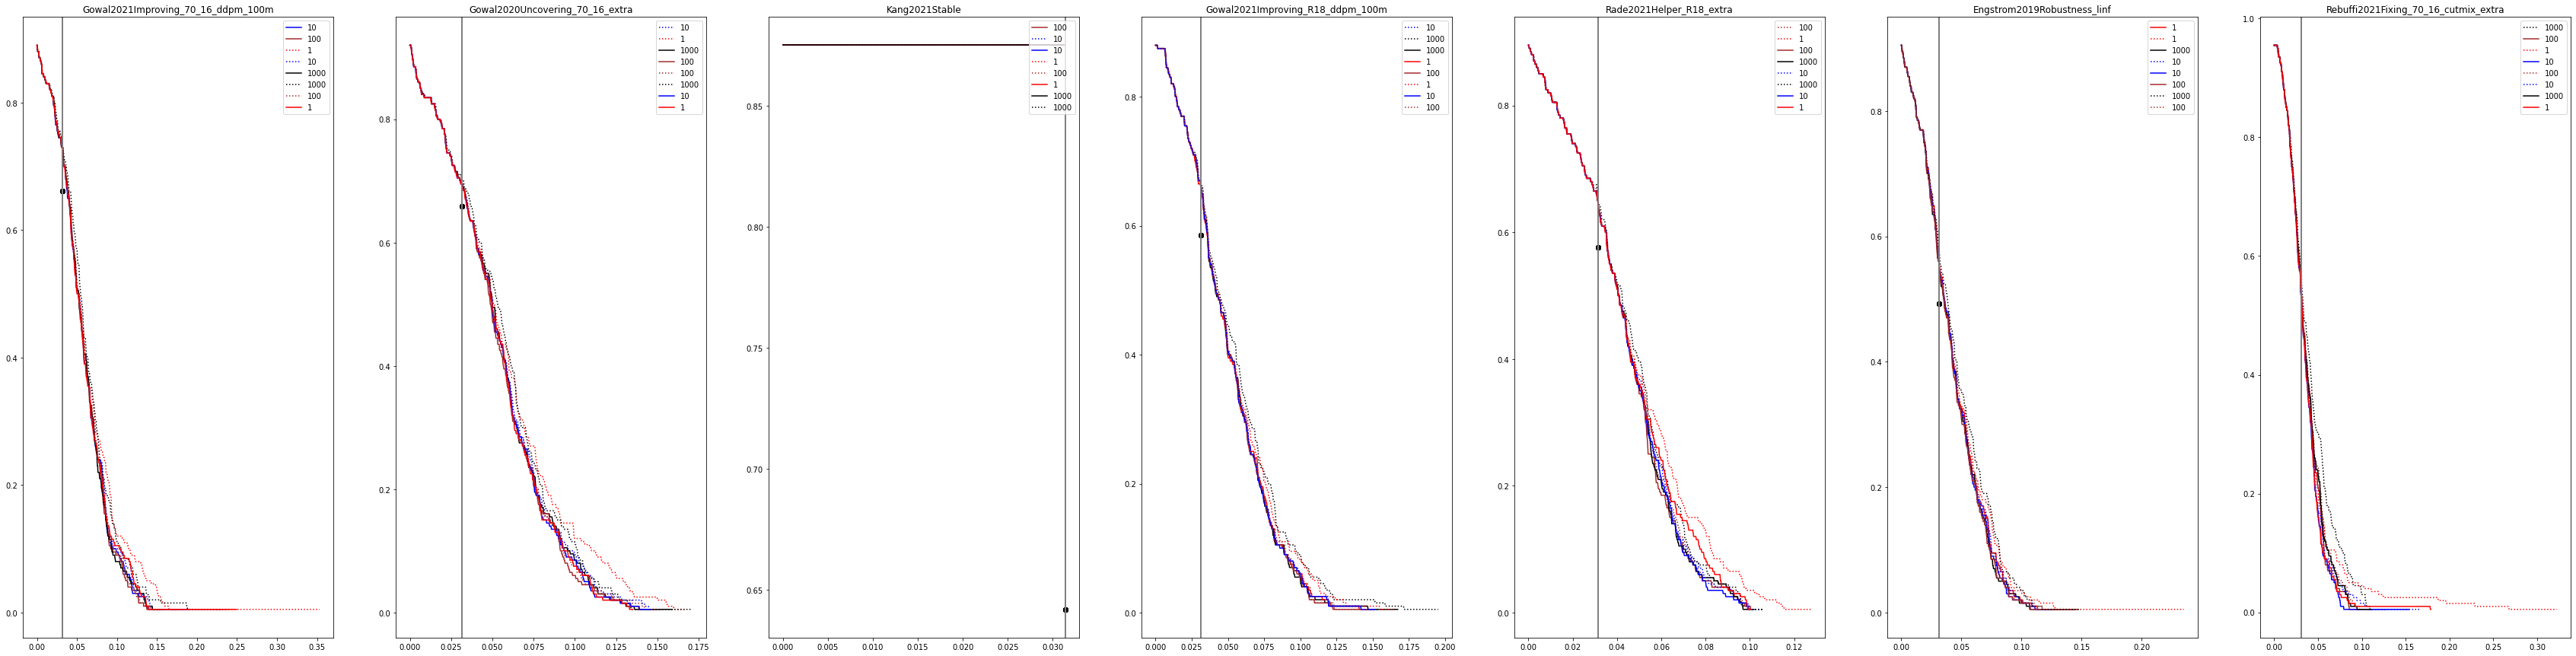

In [16]:
sweeper.logger.plot_SE_grid(where_settings={"norm":"Linf", "γ_init":"0.05"}, figsize=(60,15), compare_on="α_init")

## Observation 
* alpha_init = aplha size changes behaviour, but it is unclear which alplha is the best, generally, the aplha = 10 or 100 seem to be the best w.r.t. AUC SE

* **NOTE** that the situation at eps=8/255 is basically the same for all hypeparams and number of iterations

## Comparison of FMN with best hyperarms and the other attacks

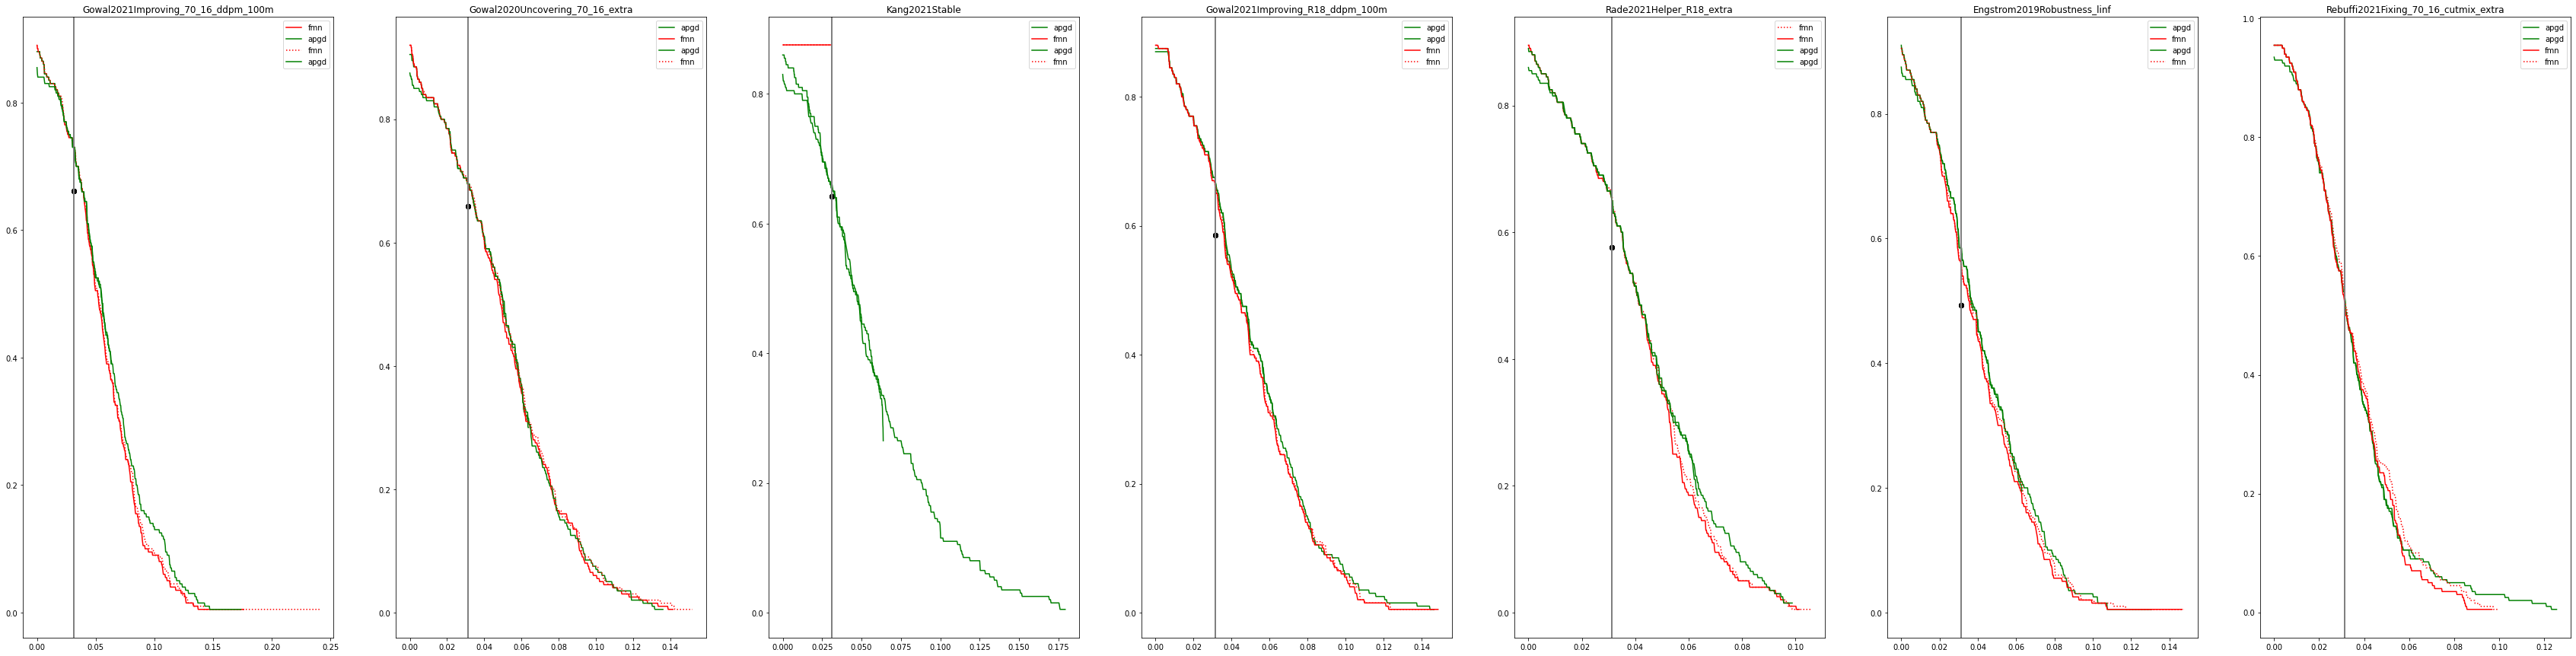

In [17]:
sweeper.logger.plot_SE_grid(where_settings={"norm":"Linf", "γ_init":"0.05", "α_init":"100-"}, figsize=(60,15))

## Observation of SE in Linf
- The robust bench robust accuracies are lower than those reached by both APGD and FMN about 5-10 %
- FMN seems to be a bit better than APGD
- 100 steps FMN seem to closely follow the 1000 steps FMN

- Note that APGD was not finetuned at all!!

## Fair comparison (fixed hyperparams)

In [18]:
report = sweeper.logger.report(sweeper.logger.where(norm="Linf", α_init="100-", γ_init=0.05))
report.reset_index(drop=True)

# apgd step overflow hack
report.steps = report.steps.replace(1020, 1000)

In [19]:
# assure that all attacks has the same number of runs
assert (report.attack.value_counts() == report.attack.value_counts()[0]).all()

## Fair params results

In [20]:
import pandas as pd

In [21]:
pd.DataFrame(report.groupby(["steps", "model", "attack"])["median"].min())

median
steps model                                attack          
100   Engstrom2019Robustness_linf          fmn     0.036015
      Gowal2020Uncovering_70_16_extra      fmn     0.049955
      Gowal2021Improving_70_16_ddpm_100m   fmn     0.052118
      Gowal2021Improving_R18_ddpm_100m     fmn     0.041734
      Kang2021Stable                       fmn          inf
      Rade2021Helper_R18_extra             fmn     0.040869
      Rebuffi2021Fixing_70_16_cutmix_extra fmn     0.032680
1000  Engstrom2019Robustness_linf          apgd    0.036313
                                           fmn     0.035422
      Gowal2020Uncovering_70_16_extra      apgd    0.050156
                                           fmn     0.048927
      Gowal2021Improving_70_16_ddpm_100m   apgd    0.054625
                                           fmn     0.051857
      Gowal2021Improving_R18_ddpm_100m     apgd    0.043313
                                           fmn     0.041691
      Kang2021Stable                       apgd    0.044719
                                           fmn          inf
      Rade2021Helper_R18_extra             apgd    0.040875
                                           fmn     0.040773
      Rebuffi2021Fixing_70_16_cutmix_extra apgd    0.032129
                                           fmn     0.031998

In [22]:
pd.DataFrame(report.groupby(["steps", "attack", "model"])["n_qs"].min())

n_qs
steps attack model                                      
100   fmn    Engstrom2019Robustness_linf            12.0
             Gowal2020Uncovering_70_16_extra        24.0
             Gowal2021Improving_70_16_ddpm_100m     34.0
             Gowal2021Improving_R18_ddpm_100m       12.0
             Kang2021Stable                          0.0
             Rade2021Helper_R18_extra                7.0
             Rebuffi2021Fixing_70_16_cutmix_extra   38.0
1000  apgd   Engstrom2019Robustness_linf           340.0
             Gowal2020Uncovering_70_16_extra       324.0
             Gowal2021Improving_70_16_ddpm_100m    247.0
             Gowal2021Improving_R18_ddpm_100m      315.0
             Kang2021Stable                        121.0
             Rade2021Helper_R18_extra              309.0
             Rebuffi2021Fixing_70_16_cutmix_extra  410.0
      fmn    Engstrom2019Robustness_linf            26.0
             Gowal2020Uncovering_70_16_extra        34.0
             Gowal2021Improving_70_16_ddpm_100m     42.0
             Gowal2021Improving_R18_ddpm_100m       12.0
             Kang2021Stable                          0.0
             Rade2021Helper_R18_extra                7.0
             Rebuffi2021Fixing_70_16_cutmix_extra   49.0

In [23]:
pd.DataFrame(report.groupby(["steps", "attack", "model"])["asr"].max())

asr
steps attack model                                      
100   fmn    Engstrom2019Robustness_linf           100.0
             Gowal2020Uncovering_70_16_extra       100.0
             Gowal2021Improving_70_16_ddpm_100m    100.0
             Gowal2021Improving_R18_ddpm_100m      100.0
             Kang2021Stable                          0.0
             Rade2021Helper_R18_extra              100.0
             Rebuffi2021Fixing_70_16_cutmix_extra  100.0
1000  apgd   Engstrom2019Robustness_linf           100.0
             Gowal2020Uncovering_70_16_extra       100.0
             Gowal2021Improving_70_16_ddpm_100m    100.0
             Gowal2021Improving_R18_ddpm_100m      100.0
             Kang2021Stable                        100.0
             Rade2021Helper_R18_extra              100.0
             Rebuffi2021Fixing_70_16_cutmix_extra  100.0
      fmn    Engstrom2019Robustness_linf           100.0
             Gowal2020Uncovering_70_16_extra       100.0
             Gowal2021Improving_70_16_ddpm_100m    100.0
             Gowal2021Improving_R18_ddpm_100m      100.0
             Kang2021Stable                          0.0
             Rade2021Helper_R18_extra              100.0
             Rebuffi2021Fixing_70_16_cutmix_extra  100.0

## L2

In [24]:
report = sweeper.logger.report(sweeper.logger.where(norm="L2"))
report.reset_index(drop=True)

dataset norm                                 model attack steps  \
0   CIFAR10   L2             Gowal2020Uncovering_extra    fmn   100   
1   CIFAR10   L2             Engstrom2019Robustness_l2    fmn  1000   
2   CIFAR10   L2             Engstrom2019Robustness_l2    fmn  1000   
3   CIFAR10   L2  Rebuffi2021Fixing_70_16_cutmix_extra    fmn   100   
4   CIFAR10   L2             Engstrom2019Robustness_l2    fmn   100   
..      ...  ...                                   ...    ...   ...   
91  CIFAR10   L2             Engstrom2019Robustness_l2    fmn  1000   
92  CIFAR10   L2   Rebuffi2021Fixing_70_16_cutmix_ddpm    fmn  1000   
93  CIFAR10   L2             Engstrom2019Robustness_l2    ddn  1000   
94  CIFAR10   L2   Rebuffi2021Fixing_70_16_cutmix_ddpm    fmn  1000   
95  CIFAR10   L2   Rebuffi2021Fixing_70_16_cutmix_ddpm    fmn   100   

                                               params    median  n_qs    asr  
0   -binary_search_steps-10-loss_f-DL-steps-100-α_...  1.088595  28.0  100.0  
1   -binary_search_steps-10-loss_f-DL-steps-1000-α...  0.857853   8.0  100.0  
2   -binary_search_steps-10-loss_f-DL-steps-1000-α...  0.858052   9.0  100.0  
3   -binary_search_steps-10-loss_f-DL-steps-100-α_...  1.149031  44.0  100.0  
4   -binary_search_steps-10-loss_f-DL-steps-100-α_...  0.861761  10.0  100.0  
..                                                ...       ...   ...    ...  
91  -binary_search_steps-10-loss_f-DL-steps-1000-α...  0.861732  11.0  100.0  
92  -binary_search_steps-10-loss_f-DL-steps-1000-α...  1.155581  15.0  100.0  
93         -loss_f-DL-steps-1000-init_norm-0.3-γ-0.05  0.842561  22.0  100.0  
94  -binary_search_steps-10-loss_f-DL-steps-1000-α...  1.155581  20.0  100.0  
95  -binary_search_steps-10-loss_f-DL-steps-100-α_...  1.162400  25.0  100.0  

[96 rows x 9 columns]

## Best params results

In [25]:
report.groupby(["model", "attack"])["median"].min()

model                                    attack
Engstrom2019Robustness_l2                alma      0.843556
                                         ddn       0.842501
                                         fmn       0.857853
Gowal2020Uncovering_extra                alma      1.053819
                                         fmn       1.079847
Rade2021Helper_R18_ddpm                  alma      1.090137
                                         fmn       1.088147
Rebuffi2021Fixing_70_16_cutmix_ddpm      alma      1.147365
                                         fmn       1.155581
Rebuffi2021Fixing_70_16_cutmix_extra     alma      1.098574
                                         fmn       1.112505
Rebuffi2021Fixing_70_16_cutmix_extra_l2  alma      1.100042
Rebuffi2021Fixing_R18_cutmix_ddpm        alma      1.058038
                                         fmn       1.113523
Name: median, dtype: float64

In [26]:
report.groupby(["attack", "model"])["n_qs"].min()

attack  model                                  
alma    Engstrom2019Robustness_l2                  52.0
        Gowal2020Uncovering_extra                  48.0
        Rade2021Helper_R18_ddpm                    48.0
        Rebuffi2021Fixing_70_16_cutmix_ddpm        45.0
        Rebuffi2021Fixing_70_16_cutmix_extra       42.0
        Rebuffi2021Fixing_70_16_cutmix_extra_l2    43.0
        Rebuffi2021Fixing_R18_cutmix_ddpm          42.0
ddn     Engstrom2019Robustness_l2                   6.0
fmn     Engstrom2019Robustness_l2                   7.0
        Gowal2020Uncovering_extra                  21.0
        Rade2021Helper_R18_ddpm                    12.0
        Rebuffi2021Fixing_70_16_cutmix_ddpm        14.0
        Rebuffi2021Fixing_70_16_cutmix_extra       23.0
        Rebuffi2021Fixing_R18_cutmix_ddpm          10.0
Name: n_qs, dtype: float64

In [27]:
report.groupby(["attack", "model"])["asr"].max()

attack  model                                  
alma    Engstrom2019Robustness_l2                  100.0
        Gowal2020Uncovering_extra                  100.0
        Rade2021Helper_R18_ddpm                    100.0
        Rebuffi2021Fixing_70_16_cutmix_ddpm        100.0
        Rebuffi2021Fixing_70_16_cutmix_extra       100.0
        Rebuffi2021Fixing_70_16_cutmix_extra_l2    100.0
        Rebuffi2021Fixing_R18_cutmix_ddpm          100.0
ddn     Engstrom2019Robustness_l2                  100.0
fmn     Engstrom2019Robustness_l2                  100.0
        Gowal2020Uncovering_extra                  100.0
        Rade2021Helper_R18_ddpm                    100.0
        Rebuffi2021Fixing_70_16_cutmix_ddpm        100.0
        Rebuffi2021Fixing_70_16_cutmix_extra       100.0
        Rebuffi2021Fixing_R18_cutmix_ddpm          100.0
Name: asr, dtype: float64

## QD in L2

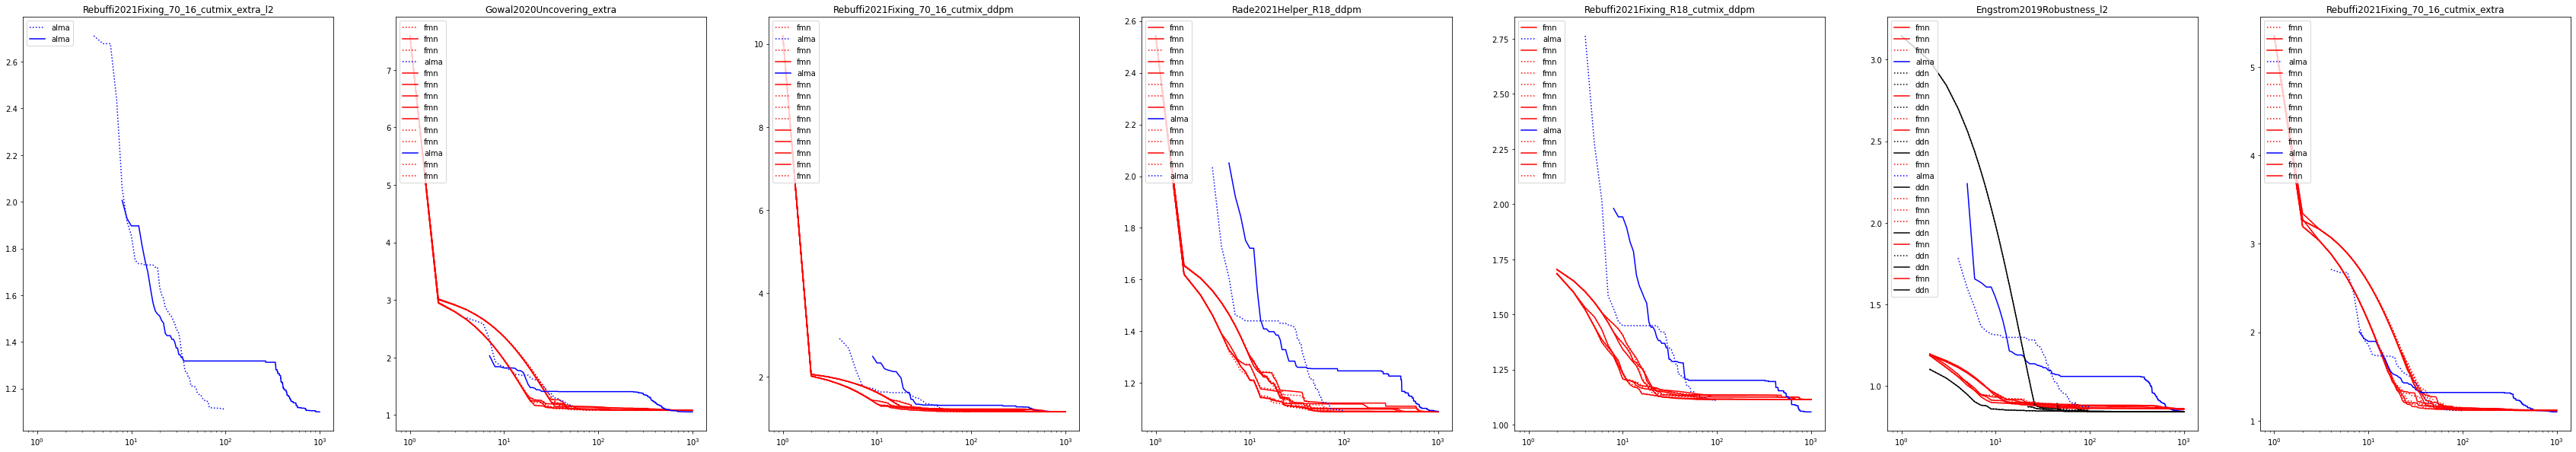

In [28]:
sweeper.logger.plot_QD_grid(where_settings={"norm":"L2"}, figsize=(60,10))

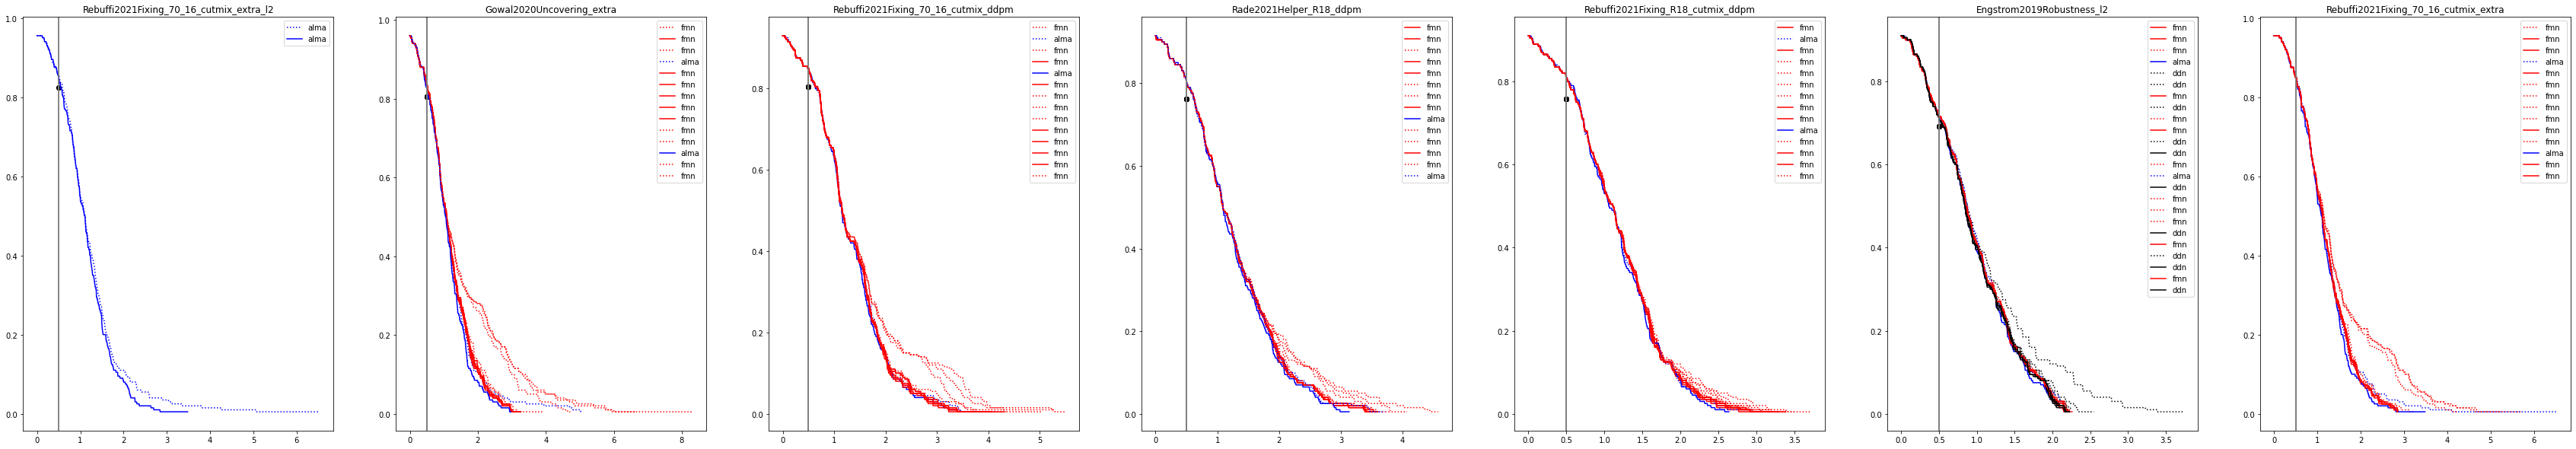

In [29]:
sweeper.logger.plot_SE_grid(where_settings={"norm":"L2"}, figsize=(60,10))

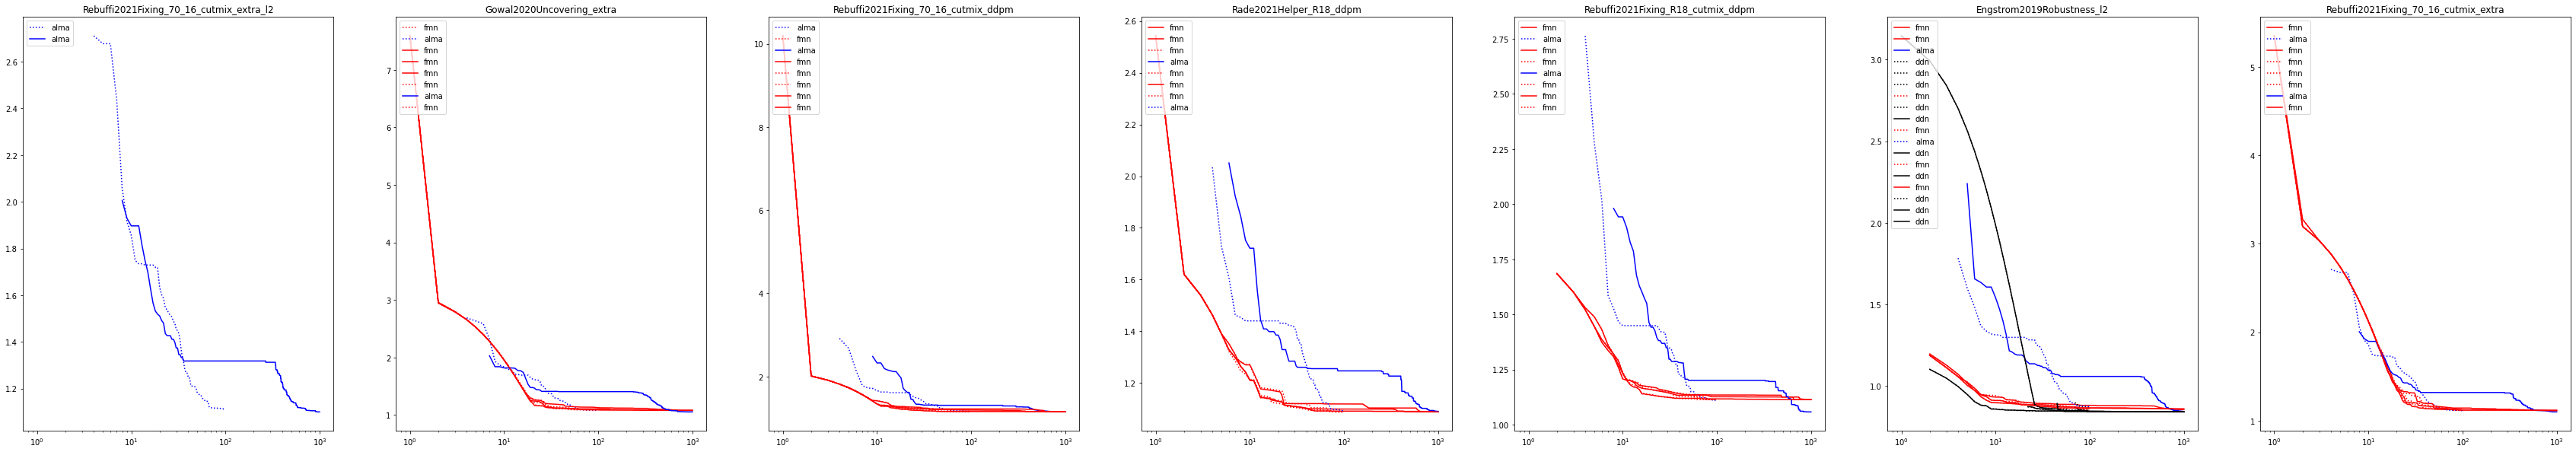

In [30]:
sweeper.logger.plot_QD_grid(where_settings={"norm":"L2", "γ_init":0.05}, figsize=(60,10))

## Observation of QD in L2
- FMN better (almost) regardless the hypeparams
- Note that NO hyperparams search was done for ALMA

## L1

In [31]:
report = sweeper.logger.report(sweeper.logger.where(norm="L1"))
report.reset_index(drop=True)

dataset norm                        model attack steps  \
0    CIFAR10   L1         Maini2020MultipleMSD    fmn   100   
1    CIFAR10   L1         Maini2020MultipleMSD    fmn  1000   
2    CIFAR10   L1  Engstrom2019Robustness_linf    fmn   100   
3    CIFAR10   L1         Maini2020MultipleMSD    fmn   100   
4    CIFAR10   L1    Engstrom2019Robustness_l2    fmn   100   
..       ...  ...                          ...    ...   ...   
107  CIFAR10   L1         Maini2020MultipleMSD    fmn   100   
108  CIFAR10   L1          Rice2020Overfitting    fmn   100   
109  CIFAR10   L1    Engstrom2019Robustness_l2   alma   100   
110  CIFAR10   L1         Maini2020MultipleMSD    fmn   100   
111  CIFAR10   L1         Maini2020MultipleAVG    fmn  1000   

                                                params     median   n_qs  \
0    -binary_search_steps-10-loss_f-DL-steps-100-α_...  12.991331   56.0   
1    -binary_search_steps-10-loss_f-DL-steps-1000-α...  12.968630   23.0   
2    -binary_search_steps-10-loss_f-DL-steps-100-α_...   6.515170   82.0   
3    -binary_search_steps-10-loss_f-DL-steps-100-α_...  13.010688   21.0   
4    -binary_search_steps-10-loss_f-DL-steps-100-α_...   8.900290   28.0   
..                                                 ...        ...    ...   
107  -binary_search_steps-10-loss_f-DL-steps-100-α_...  13.458599   72.0   
108  -binary_search_steps-10-loss_f-DL-steps-100-α_...   9.315974   37.0   
109                     -loss_f-DL-num_steps-100-α-0.5  11.202243   91.0   
110  -binary_search_steps-10-loss_f-DL-steps-100-α_...  13.030643   21.0   
111  -binary_search_steps-10-loss_f-DL-steps-1000-α...  13.091969  714.0   

            asr  
0     98.192771  
1    100.000000  
2     88.397790  
3    100.000000  
4    100.000000  
..          ...  
107   97.590362  
108  100.000000  
109  100.000000  
110  100.000000  
111   97.076023  

[112 rows x 9 columns]

## Best params results

In [32]:
import pandas as pd

In [33]:
report.groupby(["model", "attack"])["median"].min()

model                                attack
Augustin2020Adversarial_34_10_extra  alma      14.176147
                                     apgd      13.359373
                                     fmn       11.885237
Engstrom2019Robustness_l2            alma      11.202243
                                     apgd       8.753904
                                     fmn        8.635010
Engstrom2019Robustness_linf          alma       6.516683
                                     apgd       5.085937
                                     fmn        4.837933
Maini2020MultipleAVG                 alma      16.404722
                                     apgd      14.273436
                                     fmn       13.091969
Maini2020MultipleMSD                 alma      16.466394
                                     apgd      13.218748
                                     fmn       12.548836
Rice2020Overfitting                  alma      11.523362
                                     apgd   

In [34]:
report.groupby(["attack", "model"])["n_qs"].min()

attack  model                              
alma    Augustin2020Adversarial_34_10_extra     88.0
        Engstrom2019Robustness_l2               91.0
        Engstrom2019Robustness_linf             92.0
        Maini2020MultipleAVG                    86.0
        Maini2020MultipleMSD                    83.0
        Rice2020Overfitting                     92.0
        Xiao2020Enhancing                       86.0
apgd    Augustin2020Adversarial_34_10_extra    369.0
        Engstrom2019Robustness_l2              261.0
        Engstrom2019Robustness_linf            471.0
        Maini2020MultipleAVG                   249.0
        Maini2020MultipleMSD                   334.0
        Rice2020Overfitting                    444.0
        Xiao2020Enhancing                      413.0
fmn     Augustin2020Adversarial_34_10_extra     31.0
        Engstrom2019Robustness_l2               22.0
        Engstrom2019Robustness_linf             26.0
        Maini2020MultipleAVG                    16.0
  

In [35]:
report.groupby(["attack", "model"])["asr"].max()

attack  model                              
alma    Augustin2020Adversarial_34_10_extra    100.000000
        Engstrom2019Robustness_l2              100.000000
        Engstrom2019Robustness_linf            100.000000
        Maini2020MultipleAVG                   100.000000
        Maini2020MultipleMSD                   100.000000
        Rice2020Overfitting                    100.000000
        Xiao2020Enhancing                      100.000000
apgd    Augustin2020Adversarial_34_10_extra     93.956044
        Engstrom2019Robustness_l2              100.000000
        Engstrom2019Robustness_linf            100.000000
        Maini2020MultipleAVG                    95.930232
        Maini2020MultipleMSD                    91.566265
        Rice2020Overfitting                     99.447514
        Xiao2020Enhancing                       89.542484
fmn     Augustin2020Adversarial_34_10_extra    100.000000
        Engstrom2019Robustness_l2              100.000000
        Engstrom2019Robustne

## QD in L1

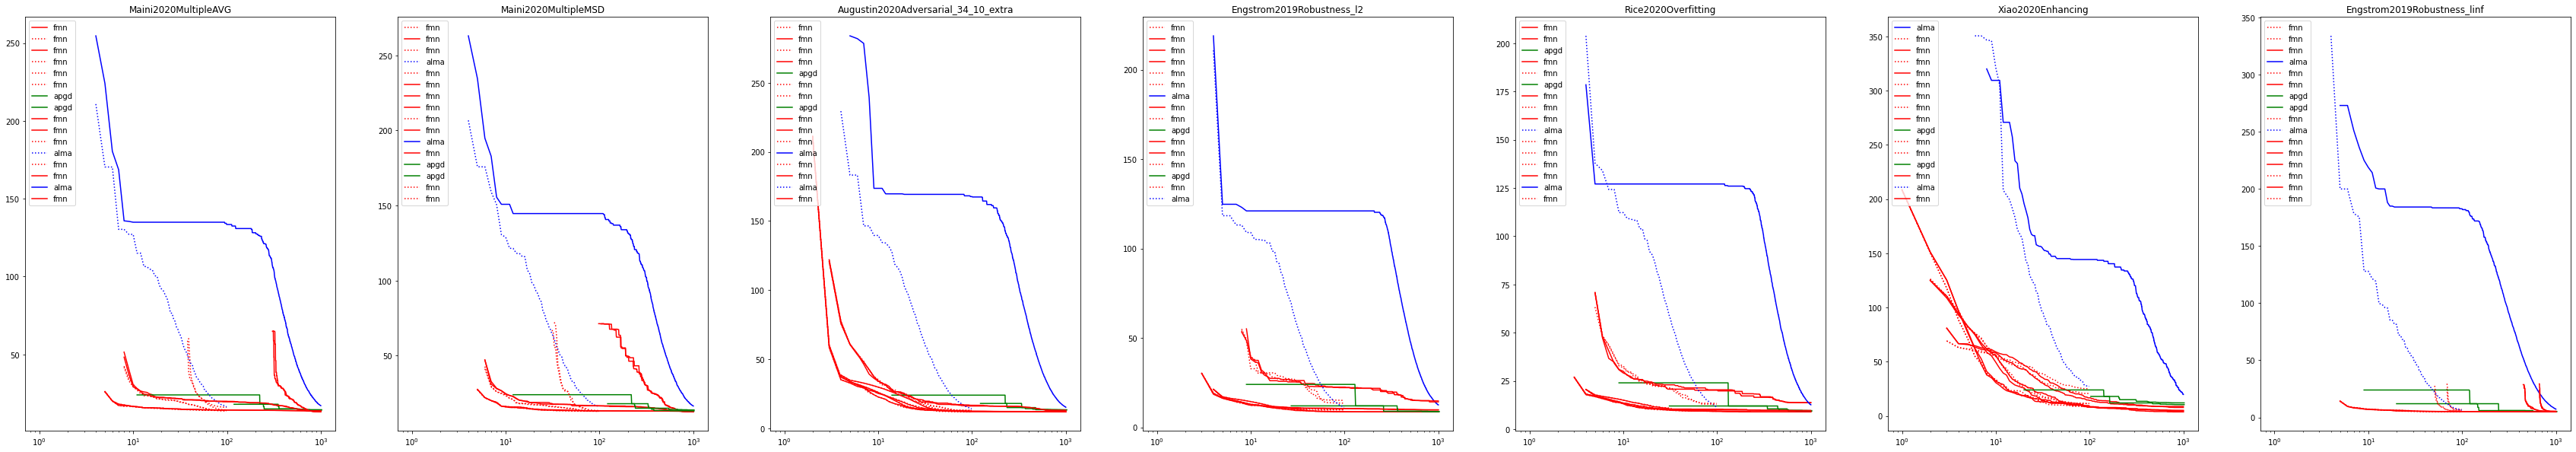

In [36]:
sweeper.logger.plot_QD_grid(where_settings={"norm":"L1"}, figsize=(60,10))

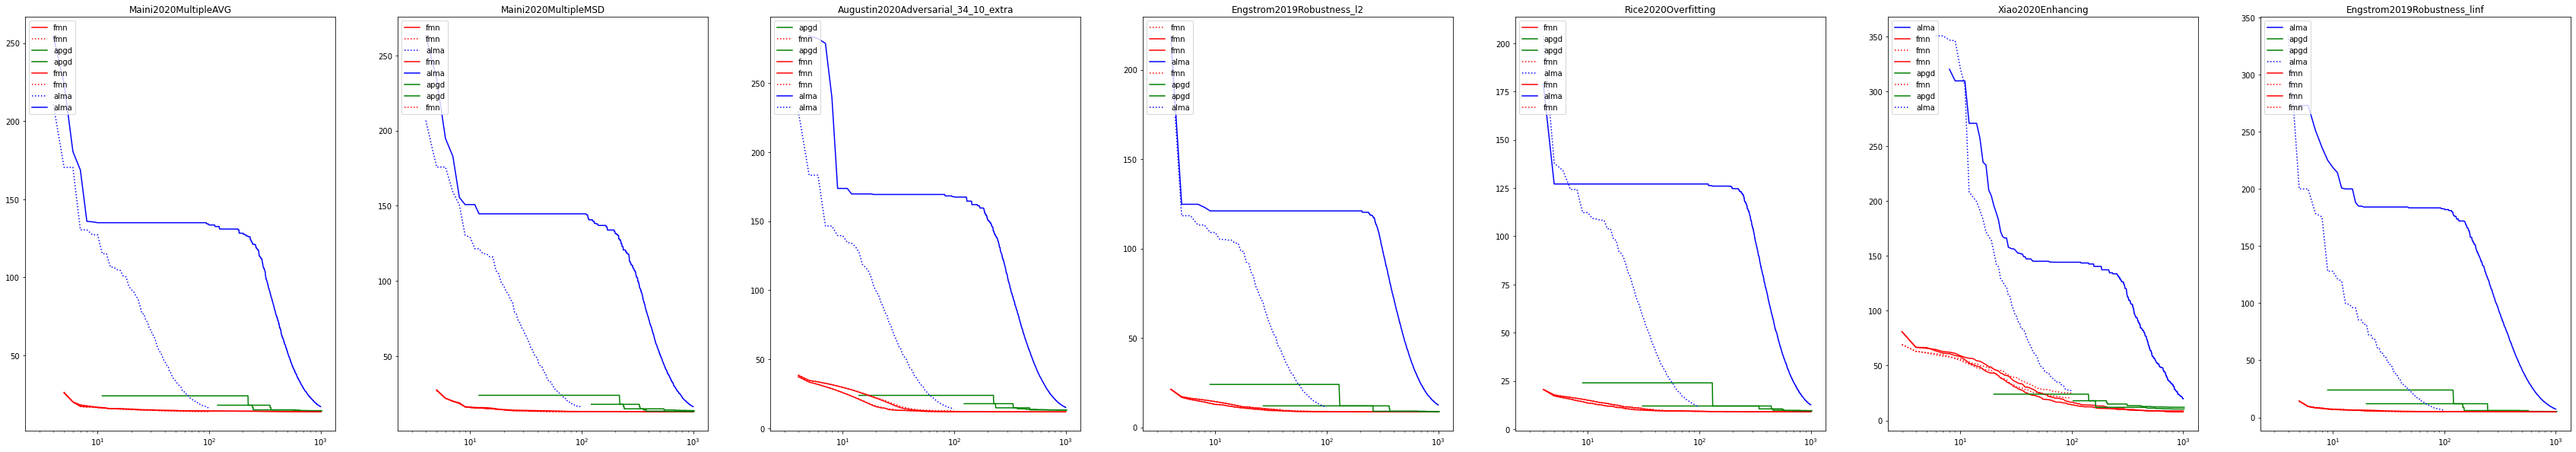

In [37]:
sweeper.logger.plot_QD_grid(where_settings={"norm":"L1", "α_init":"1-"}, figsize=(60,10))

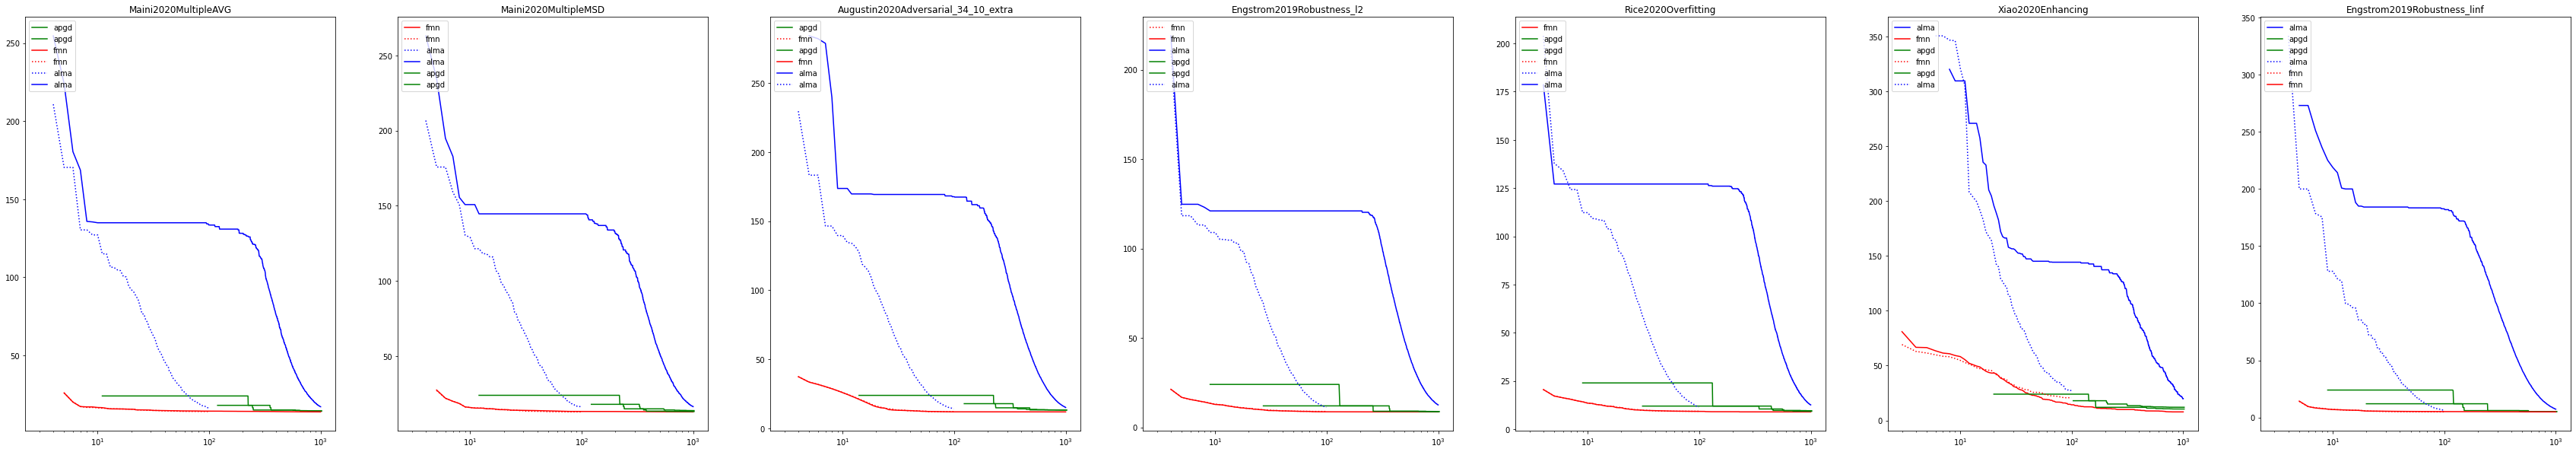

In [38]:
sweeper.logger.plot_QD_grid(where_settings={"norm":"L1", "α_init":"1-", "γ_init":0.05}, figsize=(60,10))

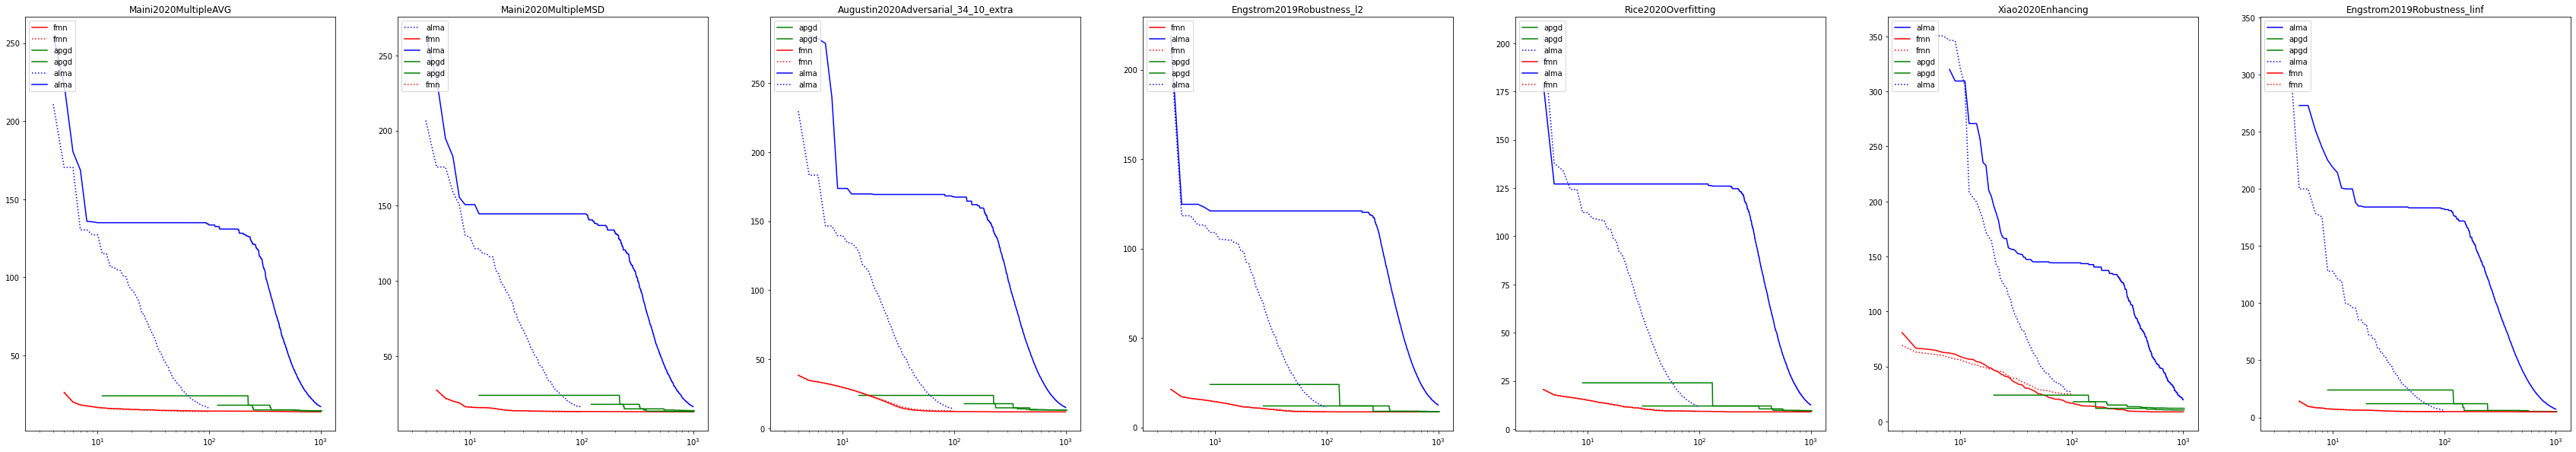

In [39]:
sweeper.logger.plot_QD_grid(where_settings={"norm":"L1", "α_init":"1-", "γ_init":0.03}, figsize=(60,10))

## Observation of QD in L1
- FMN clearly outpreforms ALMA in QD AUC (**BUT** this may be only because ALMA is not designed to have good QD)
- Crucial hyperparam in aplha_init where from [1,3,10] 1 works the best
- not much influential was gamma_init, which is better in case gamma = 0.05 than 0.03

- Note that NO hyperparams search was done for ALMA
- FMN also outperforms APGDL1 in terms of QD (same case as for ALMA)  

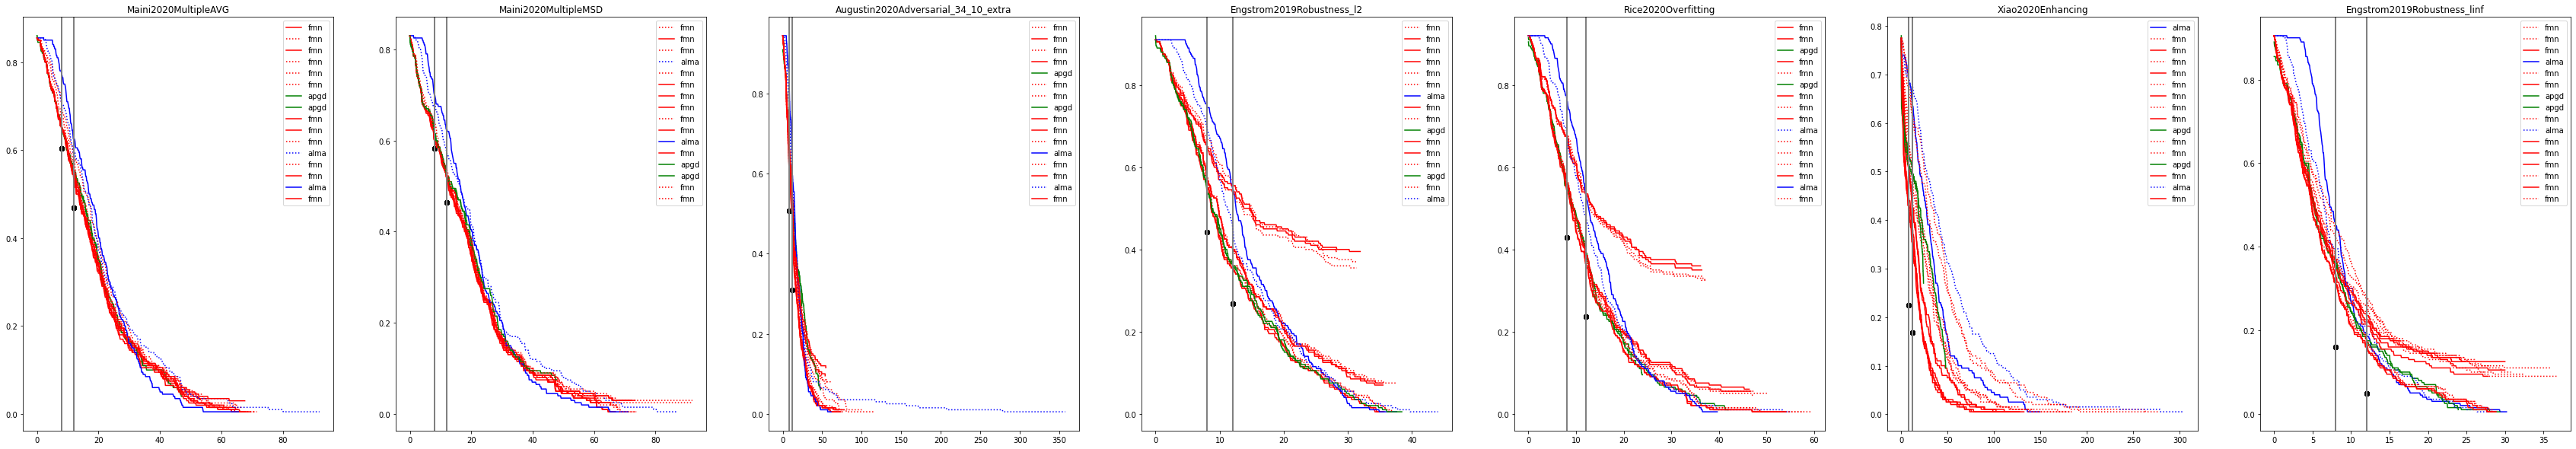

In [40]:
sweeper.logger.plot_SE_grid(where_settings={"norm":"L1"}, figsize=(60,10))

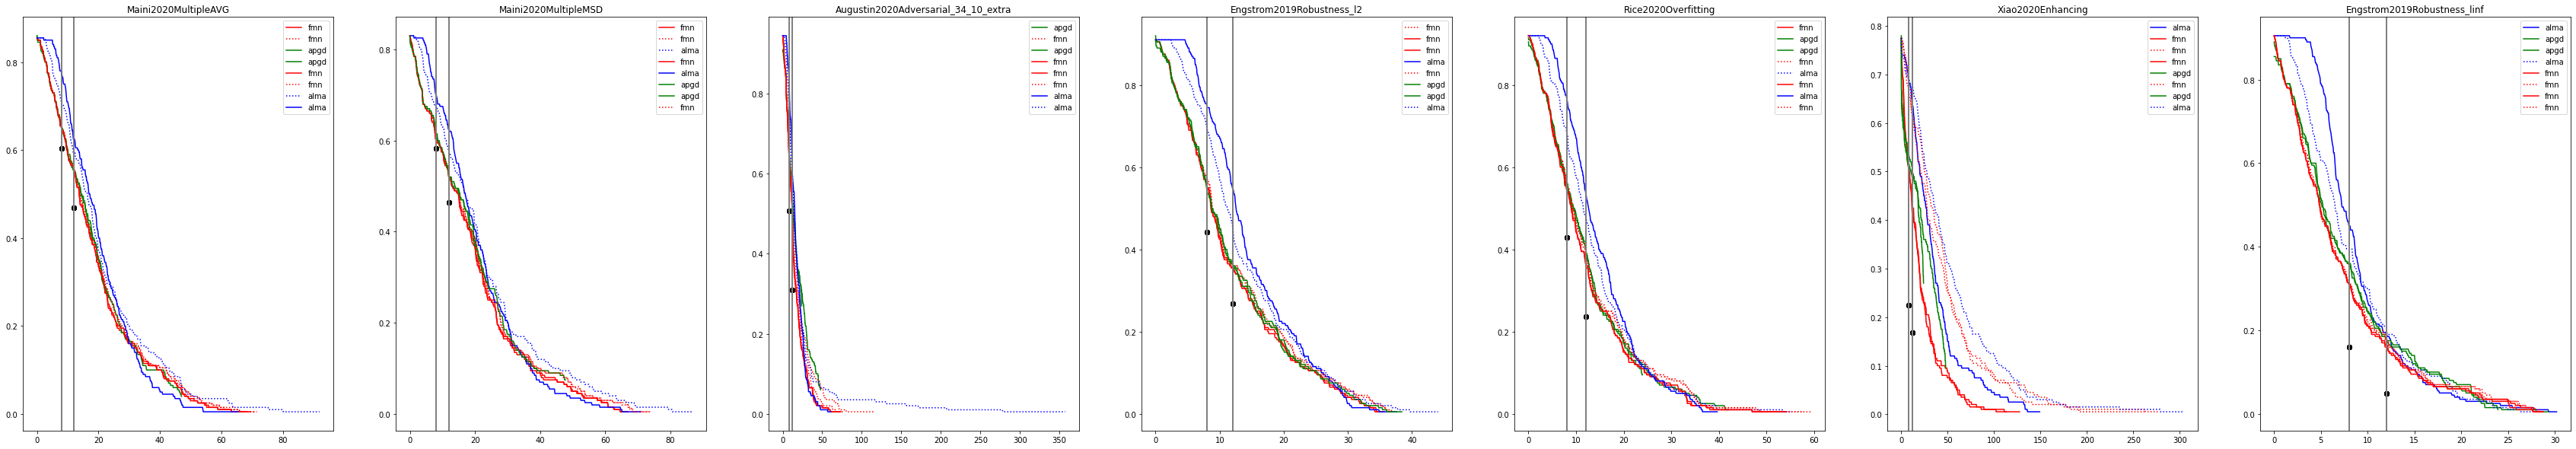

In [41]:
sweeper.logger.plot_SE_grid(where_settings={"norm":"L1", "α_init":"1-"}, figsize=(60,10))

## Observation of SE in L1
- the best reported robust accuracies in L1 APGD paper are usually 5-20% lower than those reached by minimal norm attacks
- it seems that minimal APGD L1 works similarly to FMN
- on the lower Eps FMN outperforms ALMA, on the higher eps other way around
- crucial parameter for FMN in L1 is aplha_init - out of [1,3, 10], the 1 is clearly superior
- ALMA 100 steps and 1000 steps version makes "a cross" (100 steps works better for lower eps, 1000 steps works better for higher eps)


- Special case: Xiaio2020 seems to be parituclalry special one (FMN works the best though)


- Note that NO hyperparams search was done for ALMA


## Fair comparison (fixed hyperparams)

In [42]:
report = sweeper.logger.report(sweeper.logger.where(norm="L1", α_init="1-", γ_init=0.05))
report.reset_index(drop=True)

# apgd step overflow hack
report.steps = report.steps.replace(1020, 1000)

In [43]:
# assure that all attacks has the same number of runs
assert (report.attack.value_counts() == report.attack.value_counts()[0]).all()

## Fair params results

In [44]:
import pandas as pd

In [45]:
pd.DataFrame(report.groupby(["steps", "model", "attack"])["median"].min())

median
steps model                               attack           
100   Augustin2020Adversarial_34_10_extra alma    14.176147
                                          fmn     12.205914
      Engstrom2019Robustness_l2           alma    11.202243
                                          fmn      8.900290
      Engstrom2019Robustness_linf         alma     6.516683
                                          fmn      4.906322
      Maini2020MultipleAVG                alma    16.404722
                                          fmn     14.043425
      Maini2020MultipleMSD                alma    16.507532
                                          fmn     13.010688
      Rice2020Overfitting                 alma    11.523362
                                          fmn      9.321734
      Xiao2020Enhancing                   alma    27.328842
                                          fmn     20.742342
1000  Augustin2020Adversarial_34_10_extra alma    15.243259
                                          apgd    13.359373
                                          fmn     12.052576
      Engstrom2019Robustness_l2           alma    12.553434
                                          apgd     8.753904
                                          fmn      8.635010
      Engstrom2019Robustness_linf         alma     7.239157
                                          apgd     5.085937
                                          fmn      4.881284
      Maini2020MultipleAVG                alma    17.085236
                                          apgd    14.273436
                                          fmn     13.796994
      Maini2020MultipleMSD                alma    16.466394
                                          apgd    13.218748
                                          fmn     12.968630
      Rice2020Overfitting                 alma    12.614480
                                          apgd     9.304687
                                          fmn      8.988472
      Xiao2020Enhancing                   alma    19.807697
                                          apgd    10.453123
                                          fmn      7.829725

In [46]:
pd.DataFrame(report.groupby(["steps", "attack", "model"])["n_qs"].min())

n_qs
steps attack model                                     
100   alma   Augustin2020Adversarial_34_10_extra   88.0
             Engstrom2019Robustness_l2             91.0
             Engstrom2019Robustness_linf           92.0
             Maini2020MultipleAVG                  86.0
             Maini2020MultipleMSD                  83.0
             Rice2020Overfitting                   92.0
             Xiao2020Enhancing                     86.0
      fmn    Augustin2020Adversarial_34_10_extra   31.0
             Engstrom2019Robustness_l2             28.0
             Engstrom2019Robustness_linf           26.0
             Maini2020MultipleAVG                  22.0
             Maini2020MultipleMSD                  21.0
             Rice2020Overfitting                   26.0
             Xiao2020Enhancing                     64.0
1000  alma   Augustin2020Adversarial_34_10_extra  929.0
             Engstrom2019Robustness_l2            935.0
             Engstrom2019Robustness_linf          962.0
             Maini2020MultipleAVG                 921.0
             Maini2020MultipleMSD                 918.0
             Rice2020Overfitting                  936.0
             Xiao2020Enhancing                    962.0
      apgd   Augustin2020Adversarial_34_10_extra  369.0
             Engstrom2019Robustness_l2            261.0
             Engstrom2019Robustness_linf          471.0
             Maini2020MultipleAVG                 249.0
             Maini2020MultipleMSD                 334.0
             Rice2020Overfitting                  444.0
             Xiao2020Enhancing                    413.0
      fmn    Augustin2020Adversarial_34_10_extra   31.0
             Engstrom2019Robustness_l2             30.0
             Engstrom2019Robustness_linf           33.0
             Maini2020MultipleAVG                  22.0
             Maini2020MultipleMSD                  23.0
             Rice2020Overfitting                   32.0
             Xiao2020Enhancing                    609.0

In [47]:
pd.DataFrame(report.groupby(["steps", "attack", "model"])["asr"].max())

asr
steps attack model                                          
100   alma   Augustin2020Adversarial_34_10_extra  100.000000
             Engstrom2019Robustness_l2            100.000000
             Engstrom2019Robustness_linf          100.000000
             Maini2020MultipleAVG                 100.000000
             Maini2020MultipleMSD                 100.000000
             Rice2020Overfitting                  100.000000
             Xiao2020Enhancing                    100.000000
      fmn    Augustin2020Adversarial_34_10_extra  100.000000
             Engstrom2019Robustness_l2            100.000000
             Engstrom2019Robustness_linf          100.000000
             Maini2020MultipleAVG                 100.000000
             Maini2020MultipleMSD                 100.000000
             Rice2020Overfitting                  100.000000
             Xiao2020Enhancing                    100.000000
1000  alma   Augustin2020Adversarial_34_10_extra  100.000000
             Engstrom2019Robustness_l2            100.000000
             Engstrom2019Robustness_linf          100.000000
             Maini2020MultipleAVG                 100.000000
             Maini2020MultipleMSD                 100.000000
             Rice2020Overfitting                  100.000000
             Xiao2020Enhancing                    100.000000
      apgd   Augustin2020Adversarial_34_10_extra   93.956044
             Engstrom2019Robustness_l2            100.000000
             Engstrom2019Robustness_linf          100.000000
             Maini2020MultipleAVG                  95.930232
             Maini2020MultipleMSD                  91.566265
             Rice2020Overfitting                   99.447514
             Xiao2020Enhancing                     89.542484
      fmn    Augustin2020Adversarial_34_10_extra  100.000000
             Engstrom2019Robustness_l2            100.000000
             Engstrom2019Robustness_linf          100.000000
             Maini2020MultipleAVG                 100.000000
             Maini2020MultipleMSD                 100.000000
             Rice2020Overfitting                  100.000000
             Xiao2020Enhancing                    100.000000

# Conclusions

## Linf
- best hypeparams for FMN are unclear. The gamma_init is always better 0.05, but the aplha_init is complicated. The best seems to be 10, or 100. In the Adv library is default 1, so this may be replaced, but still, the difference in performance in small
- FMN is totally failing on Kang2021Stable model
- with these hypeparams FMN outperforms minimal APGD in minimal distance medians 
- also FMN is way better in n_qs to ocnverge - **BUT** this IS misleading!!!


## L2

## L1
- best hypeparams for FMN are aplha_init = 1 and gamma_init = 0.05 -> THESE ARE THE SAME AS THE DEFAULT ones in Adv library
- with these hypeparams FMN outperforms both ALMA and minimal APGD in minimal distance medians 
- also FMN is way better in n_qs to ocnverge - **BUT** this may be misleading!!!
